<a href="https://colab.research.google.com/github/AriSu2904/gist/blob/main/CPU_Anomaly_Detection_Per_File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

In [ ]:
import os
import pandas as pd

source_folder = '/content/drive/MyDrive/NAB_RESOURCES/nab_resources/nab_origin'
files = [f for f in os.listdir(source_folder) if f.endswith('.csv')]
summary = []
total_data = 0

for file in files:
    file_path = os.path.join(source_folder, file)
    df = pd.read_csv(file_path)
    row_count = len(df)
    summary.append({'file_name': file, 'row_count': row_count})
    total_data += row_count

print(pd.DataFrame(summary))
print(f"Total: {total_data}")

                        file_name  row_count
0  ec2_cpu_utilization_5f5533.csv       4032
1  ec2_cpu_utilization_24ae8d.csv       4032
2  ec2_cpu_utilization_77c1ca.csv       4032
3  ec2_cpu_utilization_825cc2.csv       4032
4  ec2_cpu_utilization_53ea38.csv       4032
5  ec2_cpu_utilization_fe7f93.csv       4032
6  ec2_cpu_utilization_ac20cd.csv       4032
7  ec2_cpu_utilization_c6585a.csv       4032
Total: 32256


In [ ]:
import pandas as pd
import numpy as np
import os
import shutil


SOURCE_FOLDER = '/content/drive/MyDrive/NAB_RESOURCES/nab_resources/nab_origin'
OUTPUT_FOLDER = '/content/drive/MyDrive/NAB_RESOURCES/nab_resources/nab_final_split'

if os.path.exists(OUTPUT_FOLDER):
    shutil.rmtree(OUTPUT_FOLDER)
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

ground_truth = {
    "ec2_cpu_utilization_24ae8d.csv": ["2014-02-26 22:05:00", "2014-02-27 17:15:00"],
    "ec2_cpu_utilization_53ea38.csv": ["2014-02-19 19:10:00", "2014-02-23 20:05:00"],
    "ec2_cpu_utilization_5f5533.csv": ["2014-02-19 00:22:00", "2014-02-24 18:37:00"],
    "ec2_cpu_utilization_77c1ca.csv": ["2014-04-09 10:15:00"],
    "ec2_cpu_utilization_825cc2.csv": ["2014-04-15 15:44:00", "2014-04-16 03:34:00"],
    "ec2_cpu_utilization_ac20cd.csv": ["2014-04-15 00:49:00"],
    "ec2_cpu_utilization_c6585a.csv": [],
    "ec2_cpu_utilization_fe7f93.csv": ["2014-02-17 06:12:00", "2014-02-22 00:02:00", "2014-02-23 15:17:00"]
}

print("Preparing data 50:50")
print("-" * 60)

for filename, anomalies in ground_truth.items():
    file_path = os.path.join(SOURCE_FOLDER, filename)

    df = pd.read_csv(file_path)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df = df.sort_values('timestamp').reset_index(drop=True)

    df['label'] = 0
    for anomaly_time in anomalies:
        ts = pd.to_datetime(anomaly_time)
        mask = df['timestamp'] == ts
        if mask.any():
            df.loc[mask, 'label'] = 1

    n = len(df)
    split_idx = int(n * 0.50)

    train_df = df.iloc[:split_idx].copy()
    test_df = df.iloc[split_idx:].copy()

    anomali_in_train = train_df['label'].sum()
    if anomali_in_train > 0:
        train_df = train_df[train_df['label'] == 0]

    base_name = filename.replace('.csv', '')
    train_path = os.path.join(OUTPUT_FOLDER, f"{base_name}_train.csv")
    test_path = os.path.join(OUTPUT_FOLDER, f"{base_name}_test.csv")

    train_df.to_csv(train_path, index=False)
    test_df.to_csv(test_path, index=False)

    print(f"[OK] {base_name}")
    print(f"     Train: {len(train_df)} | Test: {len(test_df)}")

print("-" * 60)

Preparing data 50:50
------------------------------------------------------------
[OK] ec2_cpu_utilization_24ae8d
     Train: 2016 | Test: 2016
[OK] ec2_cpu_utilization_53ea38
     Train: 2015 | Test: 2016
[OK] ec2_cpu_utilization_5f5533
     Train: 2015 | Test: 2016
[OK] ec2_cpu_utilization_77c1ca
     Train: 2015 | Test: 2016
[OK] ec2_cpu_utilization_825cc2
     Train: 2014 | Test: 2016
[OK] ec2_cpu_utilization_ac20cd
     Train: 2016 | Test: 2016
[OK] ec2_cpu_utilization_c6585a
     Train: 2016 | Test: 2016
[OK] ec2_cpu_utilization_fe7f93
     Train: 2015 | Test: 2016
------------------------------------------------------------


In [ ]:
import pandas as pd
import numpy as np
import os
import shutil

SOURCE_FOLDER = '/content/drive/MyDrive/NAB_RESOURCES/nab_resources/nab_origin'
OUTPUT_FOLDER = '/content/drive/MyDrive/NAB_RESOURCES/nab_resources/nab_final_split_30'
TRAIN_RATIO = 0.30

if os.path.exists(OUTPUT_FOLDER):
    shutil.rmtree(OUTPUT_FOLDER)
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

ground_truth = {
    "ec2_cpu_utilization_24ae8d.csv": ["2014-02-26 22:05:00", "2014-02-27 17:15:00"],
    "ec2_cpu_utilization_53ea38.csv": ["2014-02-19 19:10:00", "2014-02-23 20:05:00"],
    "ec2_cpu_utilization_5f5533.csv": ["2014-02-19 00:22:00", "2014-02-24 18:37:00"],
    "ec2_cpu_utilization_77c1ca.csv": ["2014-04-09 10:15:00"],
    "ec2_cpu_utilization_825cc2.csv": ["2014-04-15 15:44:00", "2014-04-16 03:34:00"],
    "ec2_cpu_utilization_ac20cd.csv": ["2014-04-15 00:49:00"],
    "ec2_cpu_utilization_c6585a.csv": [],
    "ec2_cpu_utilization_fe7f93.csv": ["2014-02-17 06:12:00", "2014-02-22 00:02:00", "2014-02-23 15:17:00"]
}

print(f"Menerapkan Strategi Split {int(TRAIN_RATIO*100)}:{int((1-TRAIN_RATIO)*100)}...")
print("-" * 65)

valid_files_count = 0

for filename, anomalies in ground_truth.items():
    file_path = os.path.join(SOURCE_FOLDER, filename)

    if not os.path.exists(file_path):
        print(f"[SKIP] {filename} tidak ditemukan.")
        continue

    df = pd.read_csv(file_path)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df = df.sort_values('timestamp').reset_index(drop=True)

    df['label'] = 0
    for anomaly_time in anomalies:
        ts = pd.to_datetime(anomaly_time)
        mask = df['timestamp'] == ts
        if mask.any():
            df.loc[mask, 'label'] = 1

    #SPLIT 30:70
    n = len(df)
    split_idx = int(n * TRAIN_RATIO)

    train_df = df.iloc[:split_idx].copy()
    test_df = df.iloc[split_idx:].copy()
    train_df = train_df[train_df['label'] == 0]
    anomalies_in_test = test_df['label'].sum()
    status = "VALID (SIAP UJI)" if anomalies_in_test > 0 else "INVALID (Test Bersih)"

    if anomalies_in_test > 0:
        valid_files_count += 1

    base_name = filename.replace('.csv', '')
    train_df.to_csv(os.path.join(OUTPUT_FOLDER, f"{base_name}_train.csv"), index=False)
    test_df.to_csv(os.path.join(OUTPUT_FOLDER, f"{base_name}_test.csv"), index=False)

    print(f"File: {base_name}")
    print(f"   Train: {len(train_df)} baris | Test: {len(test_df)} baris")
    print(f"   Anomali di Test: {anomalies_in_test} -> {status}")
    print("-" * 20)

print("=" * 65)
print(f"HASIL AKHIR: {valid_files_count} dari 8 file SIAP DIPAKAI.")
print("=" * 65)

Menerapkan Strategi Split 30:70...
-----------------------------------------------------------------
File: ec2_cpu_utilization_24ae8d
   Train: 1209 baris | Test: 2823 baris
   Anomali di Test: 2 -> VALID (SIAP UJI)
--------------------
File: ec2_cpu_utilization_53ea38
   Train: 1209 baris | Test: 2823 baris
   Anomali di Test: 2 -> VALID (SIAP UJI)
--------------------
File: ec2_cpu_utilization_5f5533
   Train: 1209 baris | Test: 2823 baris
   Anomali di Test: 2 -> VALID (SIAP UJI)
--------------------
File: ec2_cpu_utilization_77c1ca
   Train: 1209 baris | Test: 2823 baris
   Anomali di Test: 1 -> VALID (SIAP UJI)
--------------------
File: ec2_cpu_utilization_825cc2
   Train: 1209 baris | Test: 2823 baris
   Anomali di Test: 2 -> VALID (SIAP UJI)
--------------------
File: ec2_cpu_utilization_ac20cd
   Train: 1209 baris | Test: 2823 baris
   Anomali di Test: 1 -> VALID (SIAP UJI)
--------------------
File: ec2_cpu_utilization_c6585a
   Train: 1209 baris | Test: 2823 baris
   Anomali

# Isolation Forest

## Tuning Params (max_sample & n_estimator)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
import os
import glob
import time
import itertools

INPUT_FOLDER = '/content/drive/MyDrive/NAB_RESOURCES/nab_resources/nab_final_split'

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_samples': [64, 128, 256]
}

print("="*60)
print("HYPERPARAMETER TUNING PROOF (2 PARAMETERS)")
print("="*60)

sample_files = glob.glob(os.path.join(INPUT_FOLDER, "*24ae8d*train.csv"))

if not sample_files:
    print("[ERROR] Sample file not found. Please check your INPUT_FOLDER path.")
else:
    target_train = sample_files[0]
    target_test = target_train.replace('_train.csv', '_test.csv')
    print(f"Target Sample File: {os.path.basename(target_train)}")

    train_df = pd.read_csv(target_train)
    test_df = pd.read_csv(target_test)

    scaler = MinMaxScaler()
    train_df['val_scaled'] = scaler.fit_transform(train_df['value'].values.reshape(-1,1))
    test_df['val_scaled'] = scaler.transform(test_df['value'].values.reshape(-1,1))

    for df in [train_df, test_df]:
        df['roll_mean'] = df['val_scaled'].rolling(5, min_periods=1).mean()
        df['diff'] = df['val_scaled'].diff().fillna(0)

    feats = ['val_scaled', 'roll_mean', 'diff']

    keys = param_grid.keys()
    combinations = list(itertools.product(*param_grid.values()))

    print(f"\n{'n_estimators':<15} | {'max_samples':<15} | {'AUC Score':<12} | {'Time (s)':<10}")
    print("-" * 60)

    results = []
    for combo in combinations:
        params = dict(zip(keys, combo))
        t0 = time.time()

        model = IsolationForest(
            n_estimators=params['n_estimators'],
            max_samples=params['max_samples'],
            contamination='auto',
            random_state=42,
            n_jobs=-1
        )
        model.fit(train_df[feats])

        scores = -model.score_samples(test_df[feats])
        auc = roc_auc_score(test_df['label'], scores)

        dt = time.time() - t0
        print(f"{params['n_estimators']:<15} | {params['max_samples']:<15} | {auc:.5f}      | {dt:.4f}")

        results.append({**params, 'auc': auc})

    best_result = max(results, key=lambda x: x['auc'])
    print("-" * 60)
    print(f"BEST CONFIGURATION:")
    print(f" > n_estimators : {best_result['n_estimators']}")
    print(f" > max_samples  : {best_result['max_samples']}")
    print(f" > Best AUC     : {best_result['auc']:.5f}")
    print("="*60)

HYPERPARAMETER TUNING PROOF (2 PARAMETERS)
Target Sample File: ec2_cpu_utilization_24ae8d_train.csv

n_estimators    | max_samples     | AUC Score    | Time (s)  
------------------------------------------------------------
100             | 64              | 0.99801      | 0.9798
100             | 128             | 0.99590      | 0.9243
100             | 256             | 0.99603      | 0.8849
200             | 64              | 0.99603      | 1.5030
200             | 128             | 0.99603      | 1.0379
200             | 256             | 0.99603      | 0.9471
300             | 64              | 0.99727      | 1.2153
300             | 128             | 0.99603      | 1.1106
300             | 256             | 0.99603      | 2.7900
------------------------------------------------------------
BEST CONFIGURATION:
 > n_estimators : 100
 > max_samples  : 64
 > Best AUC     : 0.99801


STEP 2: FINAL EXECUTION & VISUALIZATION
Using Best Parameters -> n_estimators: 100, max_samples: 64

>>> PROCESSING SERVER: ec2_cpu_utilization_24ae8d
    [RESULT] AUC Score: 0.9958 | Best F1-Score: 0.3333
    Generating plots...


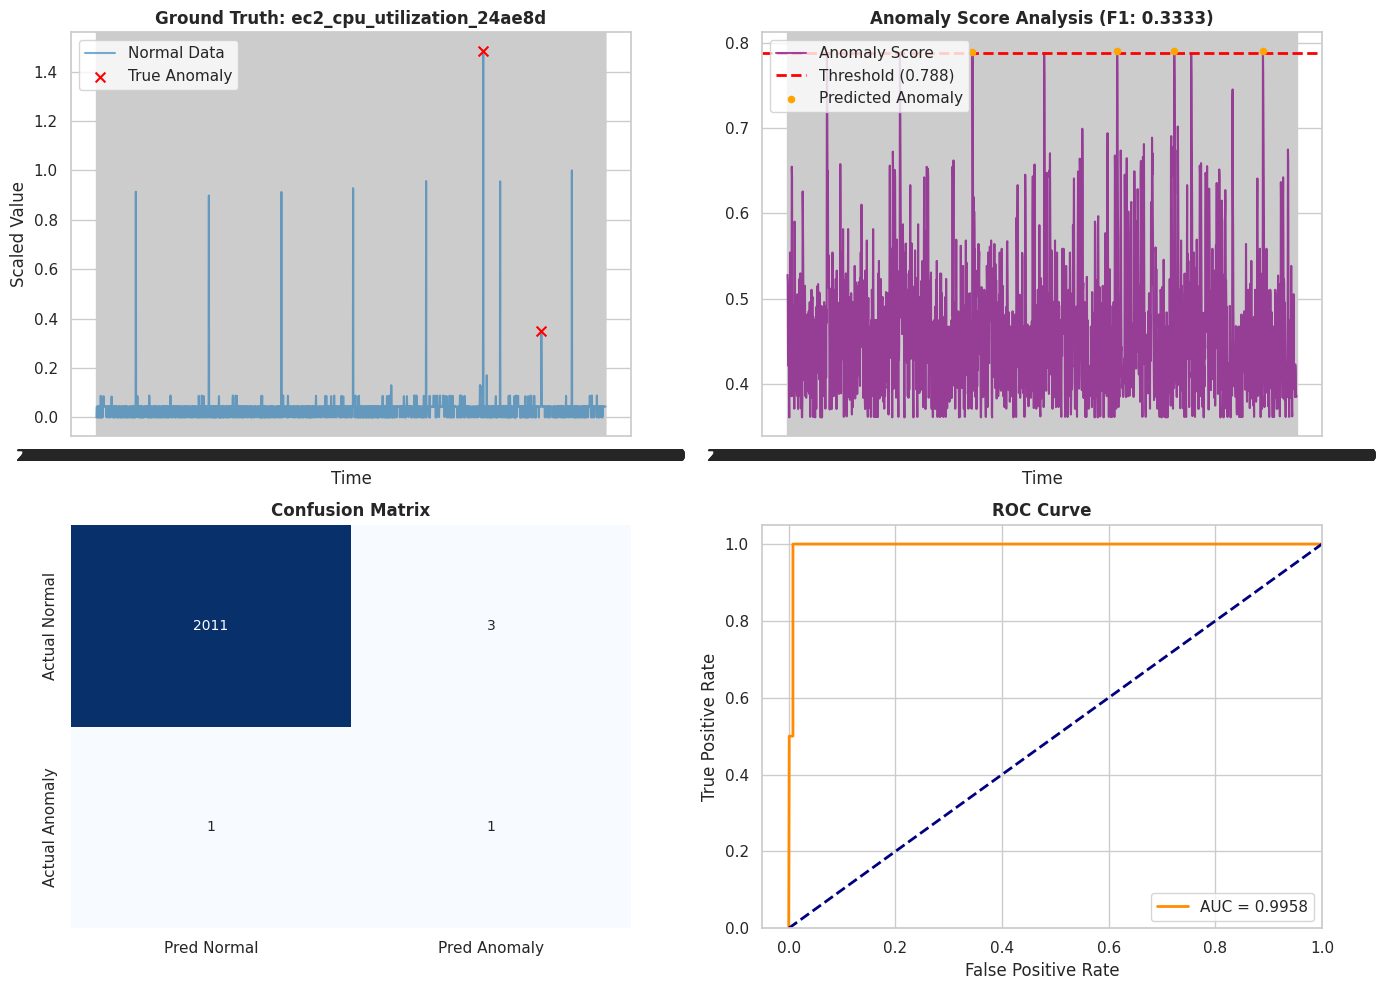


>>> PROCESSING SERVER: ec2_cpu_utilization_53ea38
    [RESULT] AUC Score: 0.5782 | Best F1-Score: 0.0023
    Generating plots...


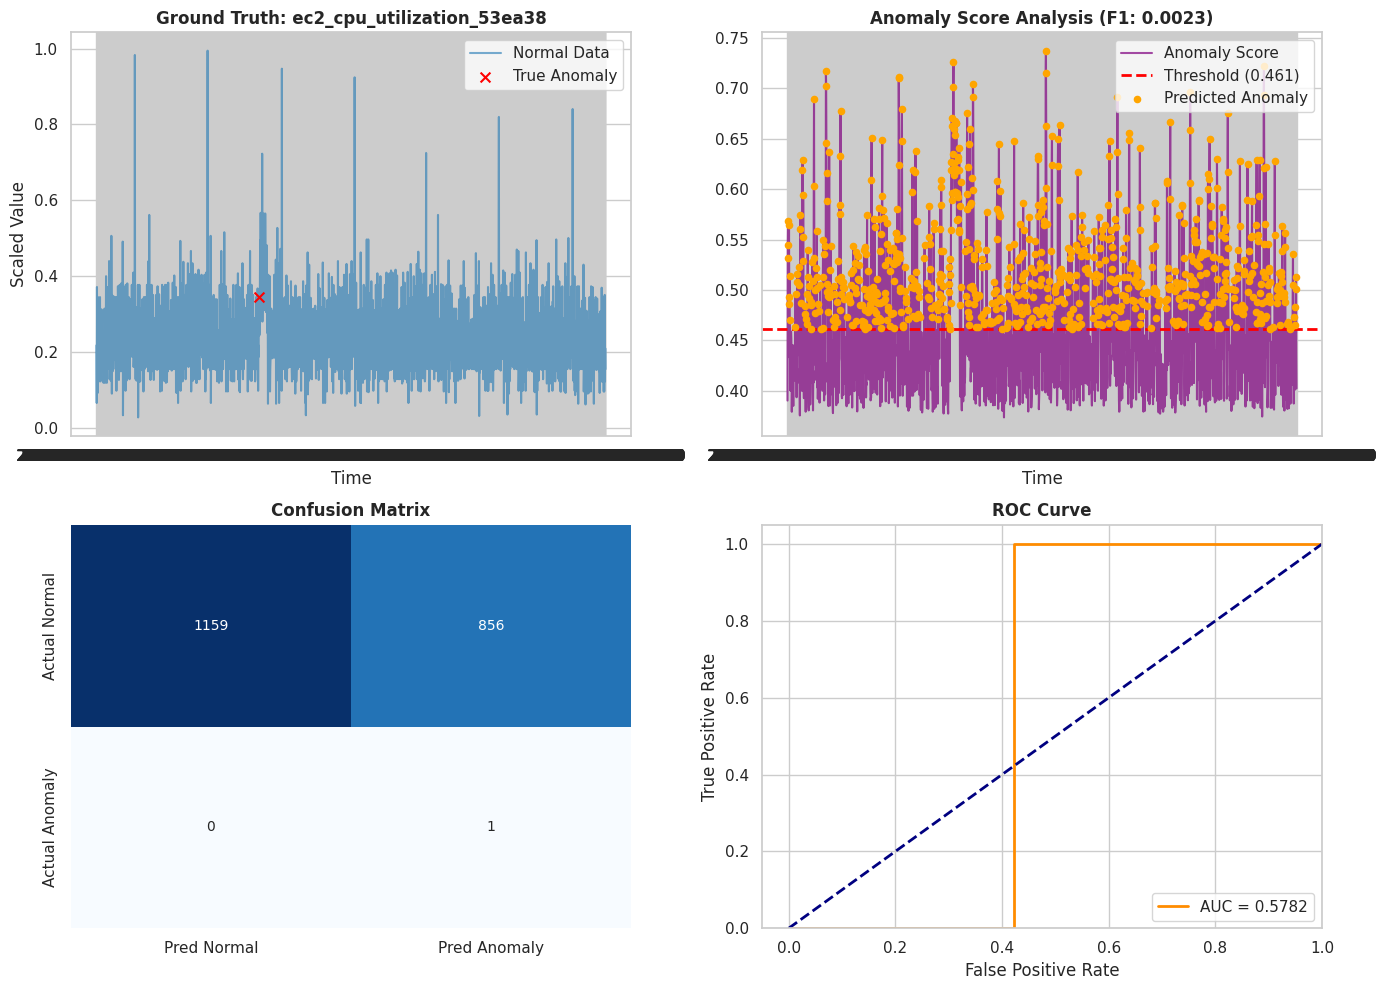


>>> PROCESSING SERVER: ec2_cpu_utilization_5f5533
    [RESULT] AUC Score: 0.9881 | Best F1-Score: 0.0645
    Generating plots...


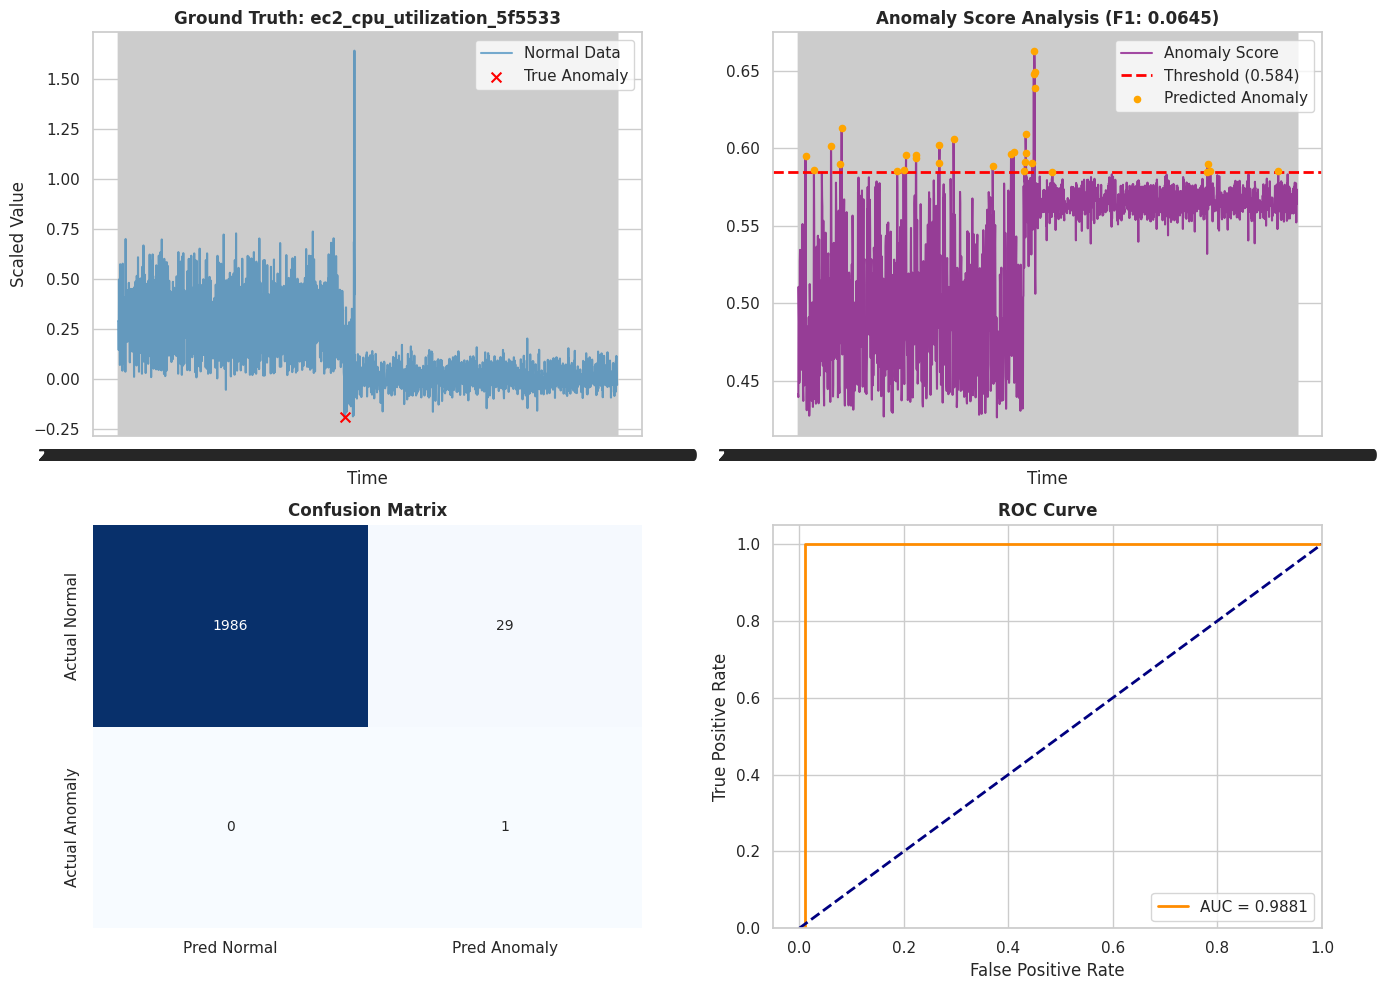


>>> PROCESSING SERVER: ec2_cpu_utilization_ac20cd
    [RESULT] AUC Score: 0.9995 | Best F1-Score: 0.6667
    Generating plots...


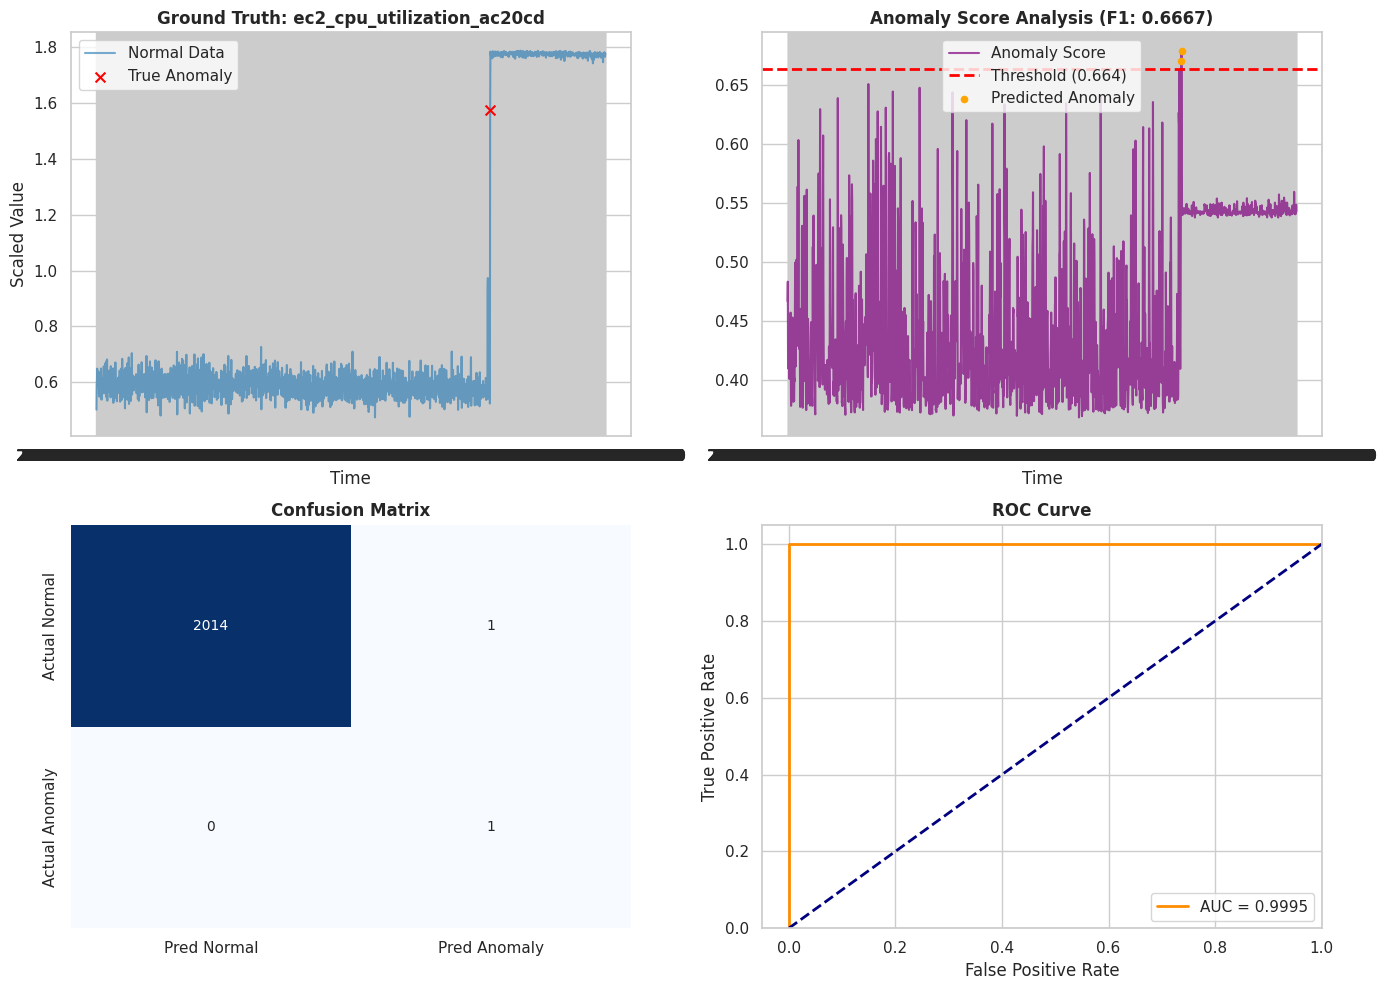


>>> PROCESSING SERVER: ec2_cpu_utilization_fe7f93
    [RESULT] AUC Score: 0.7624 | Best F1-Score: 0.0690
    Generating plots...


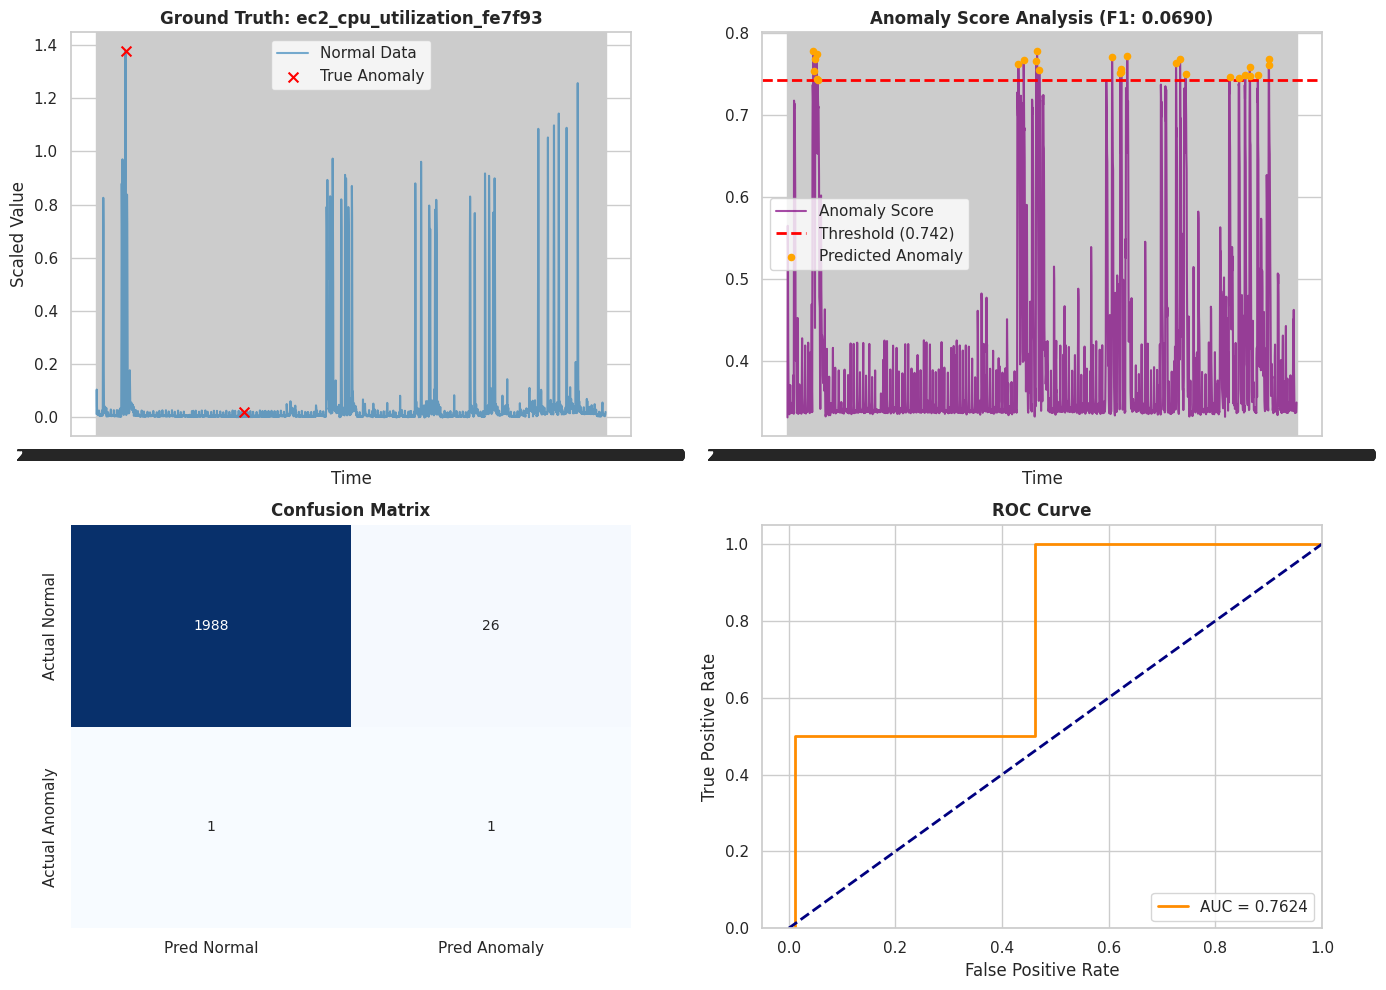


FINAL SUMMARY (ISOLATION FOREST)
                       source       auc        f1
0  ec2_cpu_utilization_24ae8d  0.995780  0.333333
1  ec2_cpu_utilization_53ea38  0.578164  0.002331
2  ec2_cpu_utilization_5f5533  0.988089  0.064516
3  ec2_cpu_utilization_ac20cd  0.999504  0.666667
4  ec2_cpu_utilization_fe7f93  0.762413  0.068966
------------------------------------------------------------
AVERAGE AUC (Macro): 0.8648
AVERAGE F1  (Macro): 0.2272


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

INPUT_FOLDER = '/content/drive/MyDrive/NAB_RESOURCES/nab_resources/nab_final_split'

BEST_N_ESTIMATORS = 100
BEST_MAX_SAMPLES = 64

def setup_plot_style():
    sns.set_theme(style="whitegrid")
    plt.rcParams['figure.figsize'] = (12, 6)
    plt.rcParams['font.size'] = 10

def show_all_plots(df_test, scores, y_pred, threshold, auc, f1, source):
    """
    Menampilkan 4 Grafik sekaligus untuk kebutuhan Bab 3 & Bab 4 Skripsi
    """
    fig = plt.figure(figsize=(14, 10))
    gs = fig.add_gridspec(2, 2)

    ax1 = fig.add_subplot(gs[0, 0])
    ax1.plot(df_test['timestamp'], df_test['value_scaled'], label='Normal Data', color='#1f77b4', alpha=0.6)
    anomalies = df_test[df_test['label'] == 1]
    if not anomalies.empty:
        ax1.scatter(anomalies['timestamp'], anomalies['value_scaled'], c='red', s=50, label='True Anomaly', zorder=5, marker='x')
    ax1.set_title(f"Ground Truth: {source}", fontweight='bold')
    ax1.set_xlabel("Time")
    ax1.set_ylabel("Scaled Value")
    ax1.legend()

    ax2 = fig.add_subplot(gs[0, 1])
    ax2.plot(df_test['timestamp'], scores, color='purple', alpha=0.7, label='Anomaly Score')
    ax2.axhline(threshold, color='red', linestyle='--', linewidth=2, label=f'Threshold ({threshold:.3f})')
    pred_anom = df_test[y_pred == 1]
    if not pred_anom.empty:
         ax2.scatter(pred_anom['timestamp'], scores[y_pred == 1], color='orange', s=20, label='Predicted Anomaly', zorder=4)
    ax2.set_title(f"Anomaly Score Analysis (F1: {f1:.4f})", fontweight='bold')
    ax2.set_xlabel("Time")
    ax2.legend()

    ax3 = fig.add_subplot(gs[1, 0])
    cm = confusion_matrix(df_test['label'], y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax3,
                xticklabels=['Pred Normal', 'Pred Anomaly'],
                yticklabels=['Actual Normal', 'Actual Anomaly'])
    ax3.set_title("Confusion Matrix", fontweight='bold')

    ax4 = fig.add_subplot(gs[1, 1])
    fpr, tpr, _ = roc_curve(df_test['label'], scores)
    ax4.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc:.4f}')
    ax4.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax4.set_xlim([-0.05, 1.0])
    ax4.set_ylim([0.0, 1.05])
    ax4.set_xlabel('False Positive Rate')
    ax4.set_ylabel('True Positive Rate')
    ax4.set_title("ROC Curve", fontweight='bold')
    ax4.legend(loc="lower right")

    plt.tight_layout()
    plt.show()

# --- MAIN PIPELINE ---
setup_plot_style()
print("="*60)
print(f"STEP 2: FINAL EXECUTION & VISUALIZATION")
print(f"Using Best Parameters -> n_estimators: {BEST_N_ESTIMATORS}, max_samples: {BEST_MAX_SAMPLES}")
print("="*60)

train_files = sorted(glob.glob(os.path.join(INPUT_FOLDER, "*_train.csv")))

if not train_files:
    print(f"[ERROR] No files found in {INPUT_FOLDER}")

results_summary = []

for train_path in train_files:
    base_name = os.path.basename(train_path).replace('_train.csv', '')
    test_path = train_path.replace('_train.csv', '_test.csv')

    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)

    scaler = MinMaxScaler()
    train_df['value_scaled'] = scaler.fit_transform(train_df['value'].values.reshape(-1,1))
    test_df['value_scaled'] = scaler.transform(test_df['value'].values.reshape(-1,1))

    for df in [train_df, test_df]:
        df['roll_mean'] = df['value_scaled'].rolling(window=5, min_periods=1).mean()
        df['diff'] = df['value_scaled'].diff().fillna(0)
        df['accel'] = df['diff'].diff().fillna(0)

    feats = ['value_scaled', 'roll_mean', 'diff', 'accel']

    model = IsolationForest(
        n_estimators=BEST_N_ESTIMATORS,
        max_samples=BEST_MAX_SAMPLES,
        contamination='auto',
        random_state=42,
        n_jobs=-1
    )
    model.fit(train_df[feats])

    scores = -model.score_samples(test_df[feats])
    y_true = test_df['label']

    if len(np.unique(y_true)) > 1:
        print(f"\n>>> PROCESSING SERVER: {base_name}")

        auc = roc_auc_score(y_true, scores)

        best_f1 = 0
        best_thresh = 0
        thresholds = np.linspace(scores.min(), scores.max(), 200)
        for t in thresholds:
            pred_t = (scores > t).astype(int)
            f1 = f1_score(y_true, pred_t, zero_division=0)
            if f1 > best_f1:
                best_f1 = f1
                best_thresh = t

        final_pred = (scores > best_thresh).astype(int)

        print(f"    [RESULT] AUC Score: {auc:.4f} | Best F1-Score: {best_f1:.4f}")
        print("    Generating plots...")

        show_all_plots(test_df, scores, final_pred, best_thresh, auc, best_f1, base_name)

        results_summary.append({'source': base_name, 'auc': auc, 'f1': best_f1})

    else:
        pass

print("\n" + "="*60)
print("FINAL SUMMARY (ISOLATION FOREST)")
print("="*60)
df_res = pd.DataFrame(results_summary)
if not df_res.empty:
    print(df_res)
    print("-" * 60)
    print(f"AVERAGE AUC (Macro): {df_res['auc'].mean():.4f}")
    print(f"AVERAGE F1  (Macro): {df_res['f1'].mean():.4f}")
else:
    print("No valid results to summarize.")
print("="*60)

STEP 2: FINAL EXECUTION & VISUALIZATION
Using Best Parameters -> n_estimators: 100, max_samples: 64

>>> PROCESSING SERVER: ec2_cpu_utilization_24ae8d
    [RESULT] AUC Score: 0.9958 | Best F1-Score: 0.2222
    Generating plots...


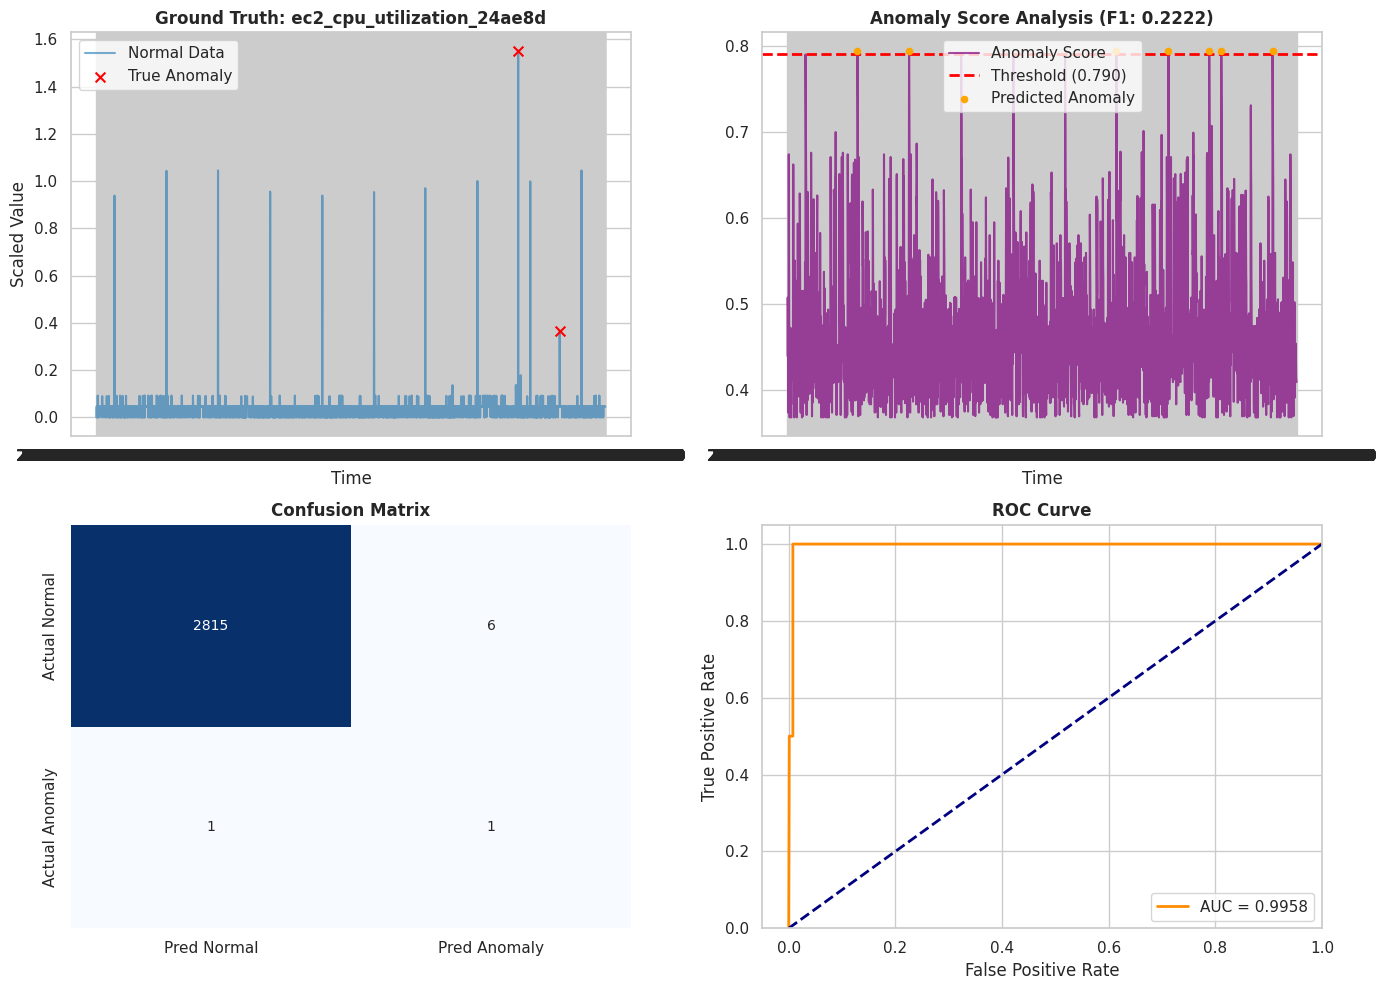


>>> PROCESSING SERVER: ec2_cpu_utilization_53ea38
    [RESULT] AUC Score: 0.7935 | Best F1-Score: 0.0196
    Generating plots...


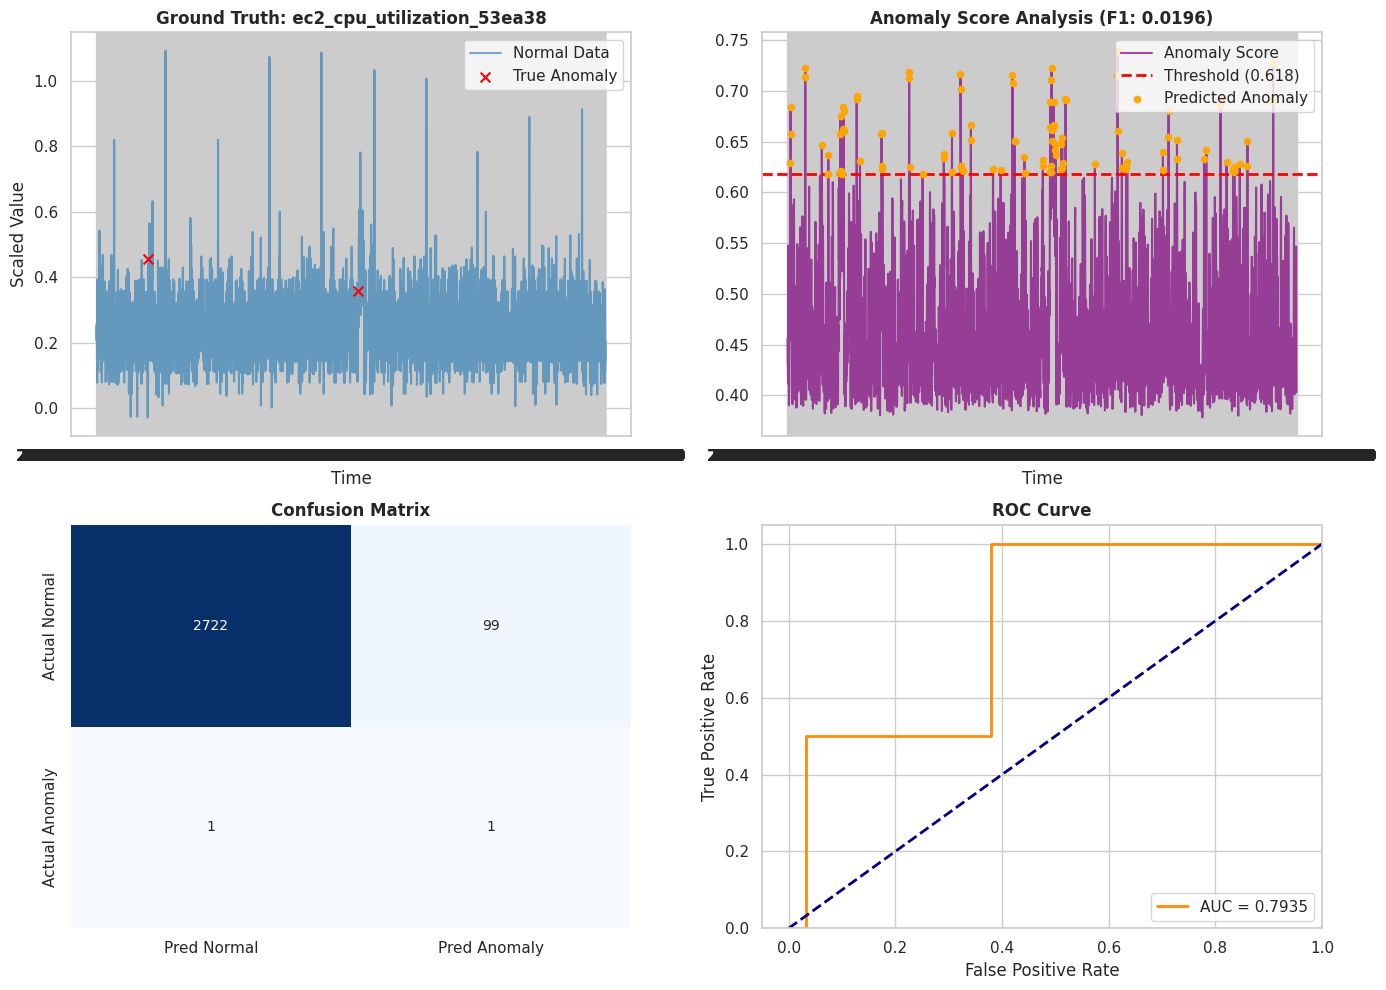


>>> PROCESSING SERVER: ec2_cpu_utilization_5f5533
    [RESULT] AUC Score: 0.7536 | Best F1-Score: 0.2500
    Generating plots...


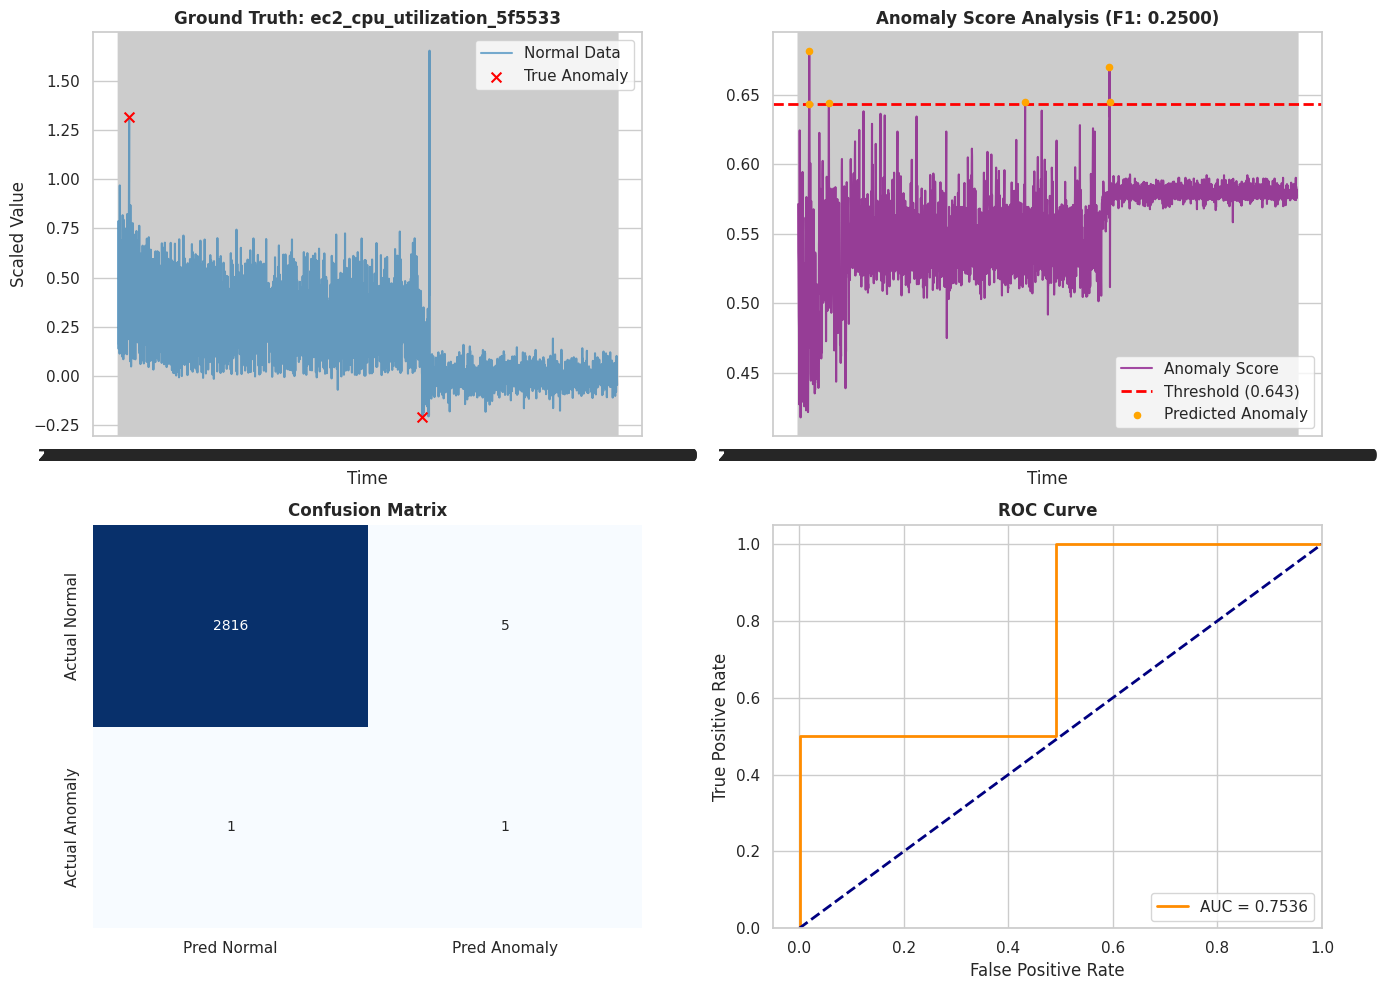


>>> PROCESSING SERVER: ec2_cpu_utilization_77c1ca
    [RESULT] AUC Score: 0.8235 | Best F1-Score: 0.0040
    Generating plots...


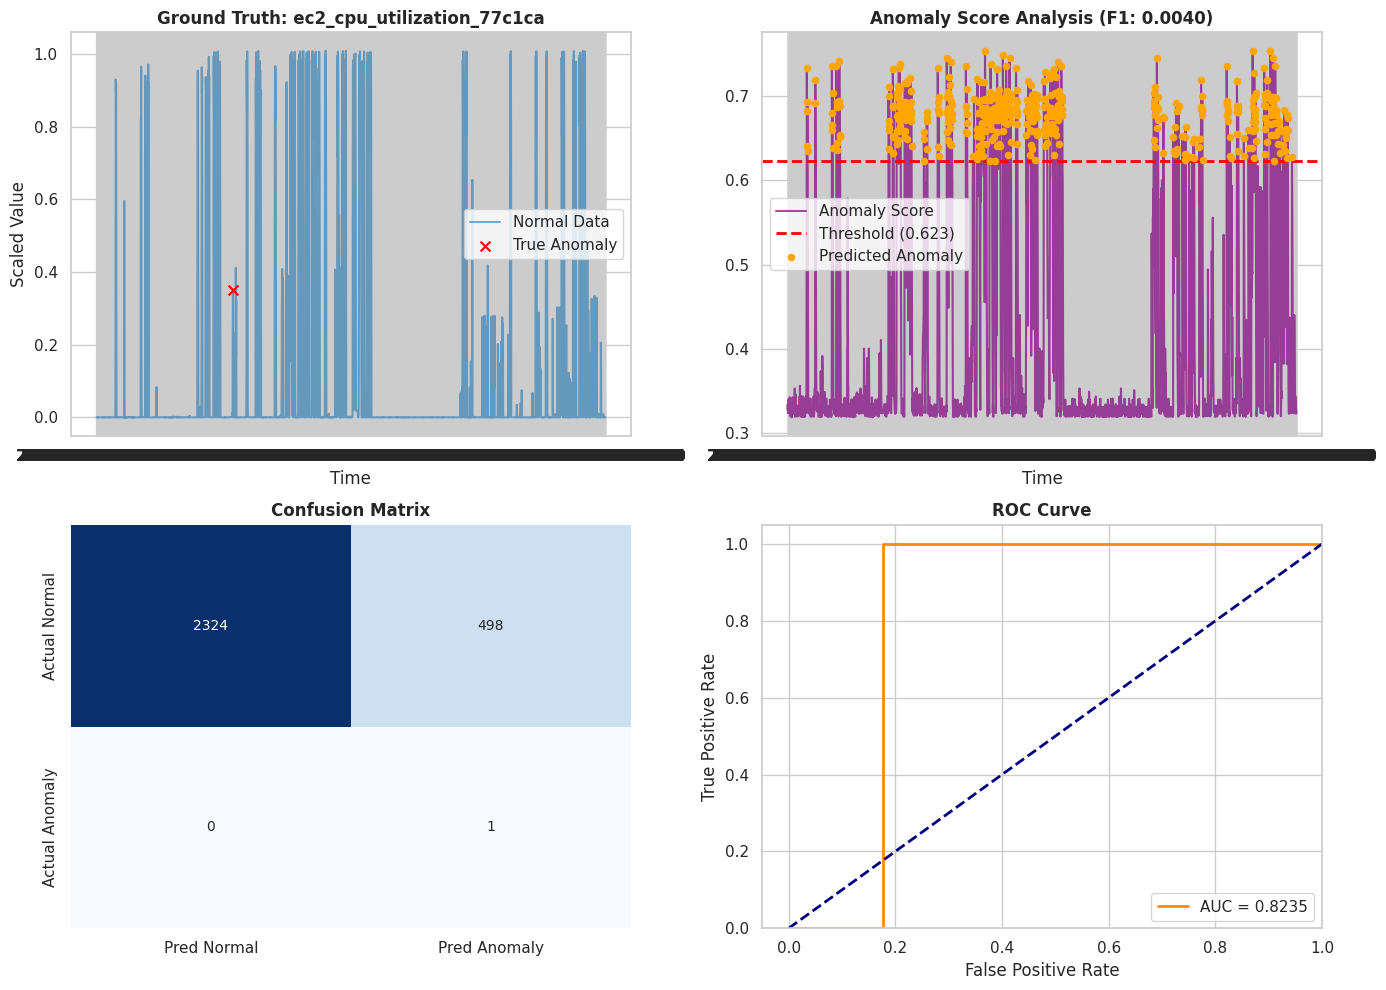


>>> PROCESSING SERVER: ec2_cpu_utilization_825cc2
    [RESULT] AUC Score: 0.9883 | Best F1-Score: 0.1111
    Generating plots...


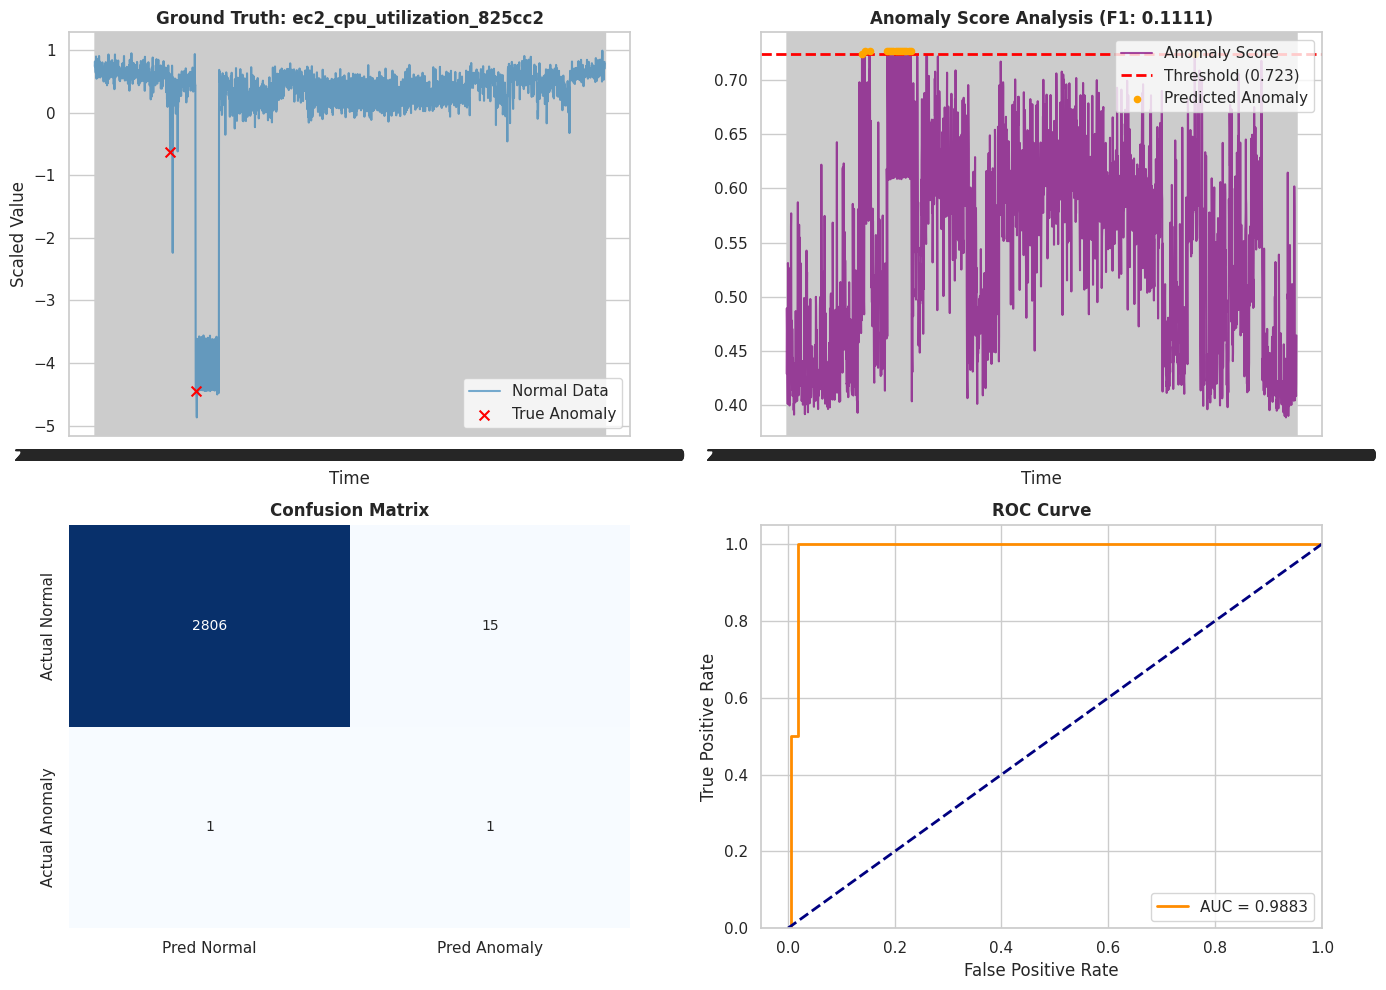


>>> PROCESSING SERVER: ec2_cpu_utilization_ac20cd
    [RESULT] AUC Score: 1.0000 | Best F1-Score: 1.0000
    Generating plots...


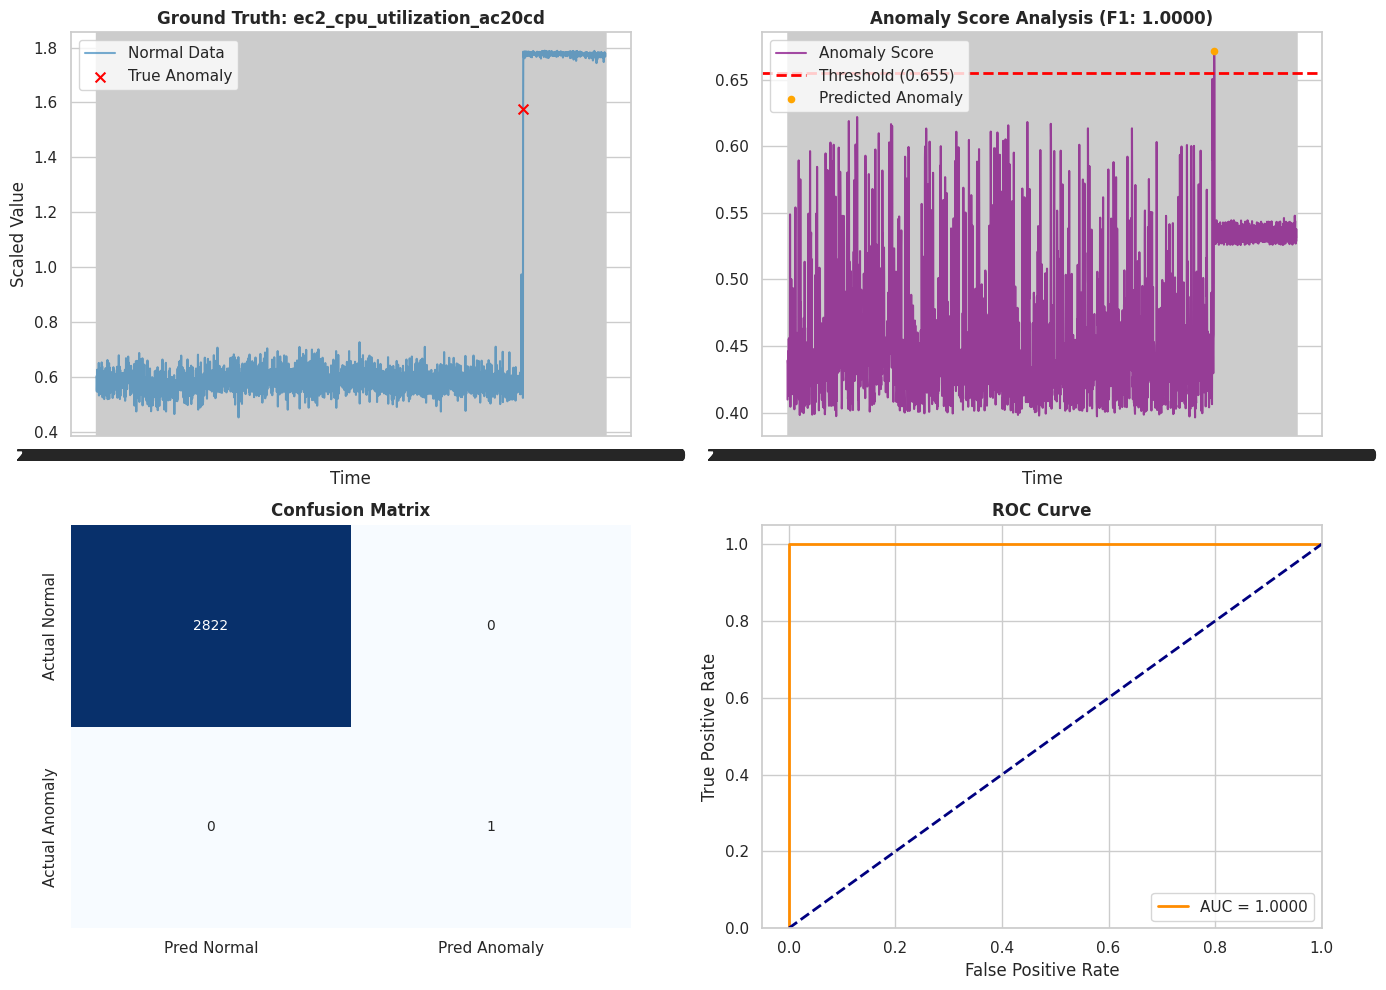


>>> PROCESSING SERVER: ec2_cpu_utilization_fe7f93
    [RESULT] AUC Score: 0.7620 | Best F1-Score: 0.0270
    Generating plots...


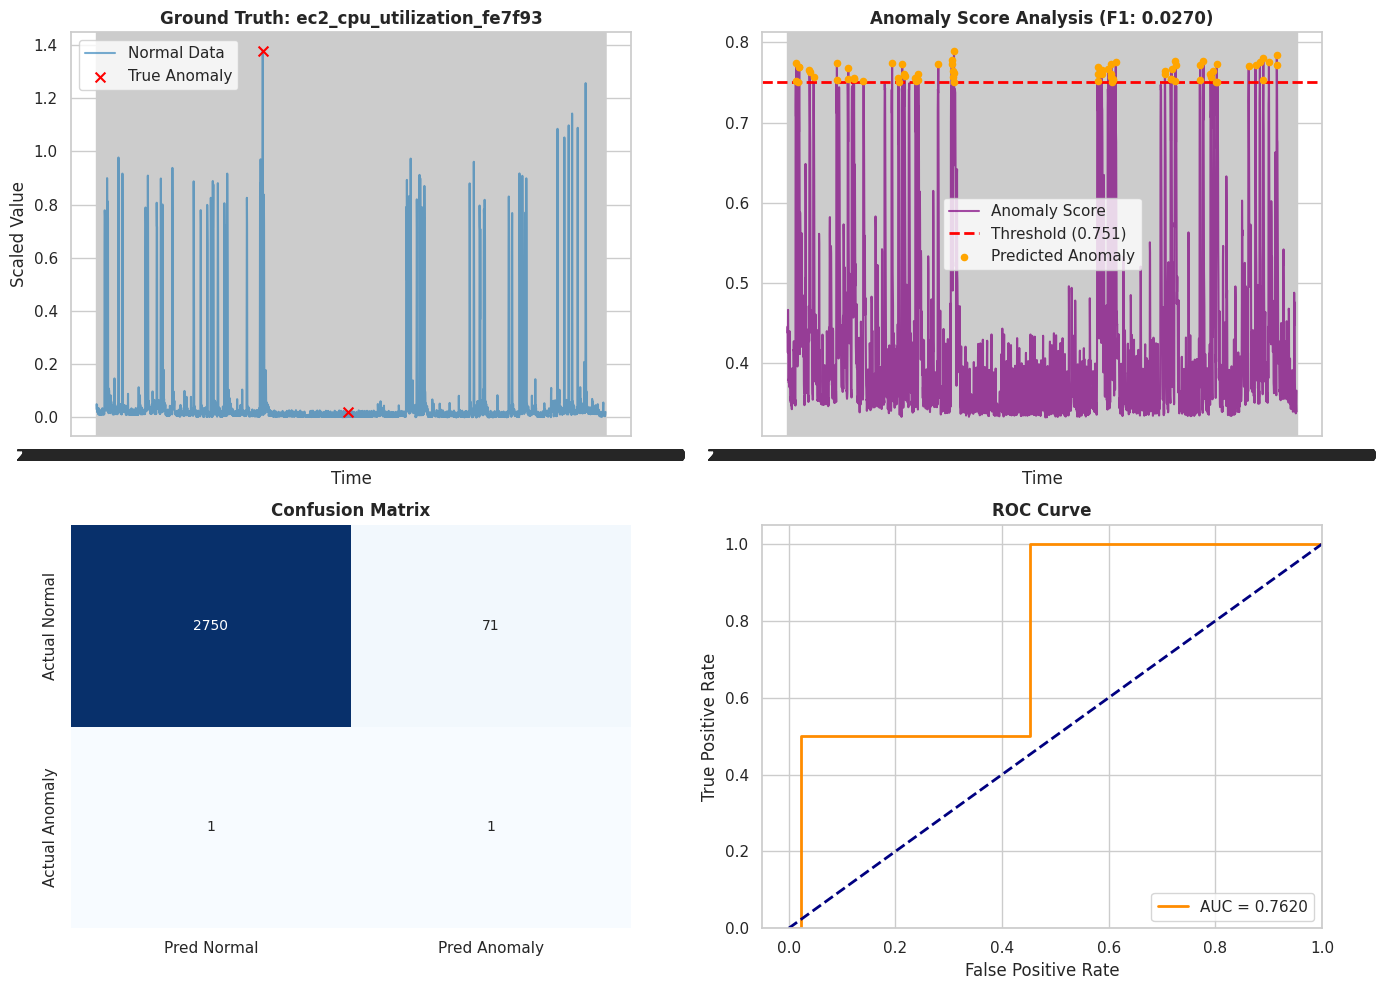


FINAL SUMMARY (ISOLATION FOREST)
                       source       auc        f1
0  ec2_cpu_utilization_24ae8d  0.995835  0.222222
1  ec2_cpu_utilization_53ea38  0.793513  0.019608
2  ec2_cpu_utilization_5f5533  0.753633  0.250000
3  ec2_cpu_utilization_77c1ca  0.823529  0.004000
4  ec2_cpu_utilization_825cc2  0.988302  0.111111
5  ec2_cpu_utilization_ac20cd  1.000000  1.000000
6  ec2_cpu_utilization_fe7f93  0.761964  0.027027
------------------------------------------------------------
AVERAGE AUC (Macro): 0.8738
AVERAGE F1  (Macro): 0.2334


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

INPUT_FOLDER = '/content/drive/MyDrive/NAB_RESOURCES/nab_resources/nab_final_split_30'

BEST_N_ESTIMATORS = 100
BEST_MAX_SAMPLES = 64

def setup_plot_style():
    sns.set_theme(style="whitegrid")
    plt.rcParams['figure.figsize'] = (12, 6)
    plt.rcParams['font.size'] = 10

def show_all_plots(df_test, scores, y_pred, threshold, auc, f1, source):
    """
    Menampilkan 4 Grafik sekaligus
    """
    fig = plt.figure(figsize=(14, 10))
    gs = fig.add_gridspec(2, 2)

    ax1 = fig.add_subplot(gs[0, 0])
    ax1.plot(df_test['timestamp'], df_test['value_scaled'], label='Normal Data', color='#1f77b4', alpha=0.6)
    anomalies = df_test[df_test['label'] == 1]
    if not anomalies.empty:
        ax1.scatter(anomalies['timestamp'], anomalies['value_scaled'], c='red', s=50, label='True Anomaly', zorder=5, marker='x')
    ax1.set_title(f"Ground Truth: {source}", fontweight='bold')
    ax1.set_xlabel("Time")
    ax1.set_ylabel("Scaled Value")
    ax1.legend()

    ax2 = fig.add_subplot(gs[0, 1])
    ax2.plot(df_test['timestamp'], scores, color='purple', alpha=0.7, label='Anomaly Score')
    ax2.axhline(threshold, color='red', linestyle='--', linewidth=2, label=f'Threshold ({threshold:.3f})')
    pred_anom = df_test[y_pred == 1]
    if not pred_anom.empty:
         ax2.scatter(pred_anom['timestamp'], scores[y_pred == 1], color='orange', s=20, label='Predicted Anomaly', zorder=4)
    ax2.set_title(f"Anomaly Score Analysis (F1: {f1:.4f})", fontweight='bold')
    ax2.set_xlabel("Time")
    ax2.legend()

    ax3 = fig.add_subplot(gs[1, 0])
    cm = confusion_matrix(df_test['label'], y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax3,
                xticklabels=['Pred Normal', 'Pred Anomaly'],
                yticklabels=['Actual Normal', 'Actual Anomaly'])
    ax3.set_title("Confusion Matrix", fontweight='bold')

    ax4 = fig.add_subplot(gs[1, 1])
    fpr, tpr, _ = roc_curve(df_test['label'], scores)
    ax4.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc:.4f}')
    ax4.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax4.set_xlim([-0.05, 1.0])
    ax4.set_ylim([0.0, 1.05])
    ax4.set_xlabel('False Positive Rate')
    ax4.set_ylabel('True Positive Rate')
    ax4.set_title("ROC Curve", fontweight='bold')
    ax4.legend(loc="lower right")

    plt.tight_layout()
    plt.show()

# --- MAIN PIPELINE ---
setup_plot_style()
print("="*60)
print(f"FINAL EXECUTION & VISUALIZATION")
print(f"Using Best Parameters -> n_estimators: {BEST_N_ESTIMATORS}, max_samples: {BEST_MAX_SAMPLES}")
print("="*60)

train_files = sorted(glob.glob(os.path.join(INPUT_FOLDER, "*_train.csv")))

if not train_files:
    print(f"[ERROR] No files found in {INPUT_FOLDER}")

results_summary = []

for train_path in train_files:
    base_name = os.path.basename(train_path).replace('_train.csv', '')
    test_path = train_path.replace('_train.csv', '_test.csv')

    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)

    scaler = MinMaxScaler()
    train_df['value_scaled'] = scaler.fit_transform(train_df['value'].values.reshape(-1,1))
    test_df['value_scaled'] = scaler.transform(test_df['value'].values.reshape(-1,1))

    for df in [train_df, test_df]:
        df['roll_mean'] = df['value_scaled'].rolling(window=5, min_periods=1).mean()
        df['diff'] = df['value_scaled'].diff().fillna(0)
        df['accel'] = df['diff'].diff().fillna(0)

    feats = ['value_scaled', 'roll_mean', 'diff', 'accel']

    model = IsolationForest(
        n_estimators=BEST_N_ESTIMATORS,
        max_samples=BEST_MAX_SAMPLES,
        contamination='auto',
        random_state=42,
        n_jobs=-1
    )
    model.fit(train_df[feats])

    scores = -model.score_samples(test_df[feats])
    y_true = test_df['label']

    if len(np.unique(y_true)) > 1:
        print(f"\n>>> PROCESSING SERVER: {base_name}")

        auc = roc_auc_score(y_true, scores)

        best_f1 = 0
        best_thresh = 0
        thresholds = np.linspace(scores.min(), scores.max(), 200)
        for t in thresholds:
            pred_t = (scores > t).astype(int)
            f1 = f1_score(y_true, pred_t, zero_division=0)
            if f1 > best_f1:
                best_f1 = f1
                best_thresh = t

        final_pred = (scores > best_thresh).astype(int)

        print(f"    [RESULT] AUC Score: {auc:.4f} | Best F1-Score: {best_f1:.4f}")
        print("    Generating plots...")

        show_all_plots(test_df, scores, final_pred, best_thresh, auc, best_f1, base_name)

        results_summary.append({'source': base_name, 'auc': auc, 'f1': best_f1})

    else:
        pass

print("\n" + "="*60)
print("FINAL SUMMARY (ISOLATION FOREST)")
print("="*60)
df_res = pd.DataFrame(results_summary)
if not df_res.empty:
    print(df_res)
    print("-" * 60)
    print(f"AVERAGE AUC (Macro): {df_res['auc'].mean():.4f}")
    print(f"AVERAGE F1  (Macro): {df_res['f1'].mean():.4f}")
else:
    print("No valid results to summarize.")
print("="*60)

#VAE-LSTM

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
import os
import glob
import time
import itertools

INPUT_FOLDER = '/content/drive/MyDrive/NAB_RESOURCES/nab_resources/nab_final_split'
TIME_STEPS = 10

param_grid = {
    'latent_dim': [2, 4, 8],
    'lstm_units': [16, 32, 64]
}

tf.random.set_seed(42)
np.random.seed(42)

print("="*60)
print("STEP 1: VAE-LSTM HYPERPARAMETER TUNING")
print("="*60)

sample_files = glob.glob(os.path.join(INPUT_FOLDER, "*24ae8d*train.csv"))
if not sample_files:
    print("[ERROR] Sample file not found.")
    exit()

target_train = sample_files[0]
target_test = target_train.replace('_train.csv', '_test.csv')
print(f"Sample File: {os.path.basename(target_train)}")

train_df = pd.read_csv(target_train)
test_df = pd.read_csv(target_test)

scaler = StandardScaler()
train_vals = scaler.fit_transform(train_df['value'].values.reshape(-1,1))
test_vals = scaler.transform(test_df['value'].values.reshape(-1,1))

def create_sequences(values):
    xs = []
    if len(values) > TIME_STEPS:
        for i in range(len(values) - TIME_STEPS):
            xs.append(values[i:(i + TIME_STEPS)])
    return np.array(xs)

X_train = create_sequences(train_vals)
X_test = create_sequences(test_vals)
y_true = test_df['label'].values[TIME_STEPS:]

def build_vae_dynamic(lstm_units, latent_dim):
    # Encoder
    enc_in = keras.Input(shape=(TIME_STEPS, 1))
    x = layers.LSTM(lstm_units, return_sequences=False)(enc_in)
    z_mean = layers.Dense(latent_dim)(x)
    z_log_var = layers.Dense(latent_dim)(x)

    def sampling(args):
        zm, zv = args
        batch = tf.shape(zm)[0]
        dim = tf.shape(zm)[1]
        eps = tf.keras.backend.random_normal(shape=(batch, dim))
        return zm + tf.keras.backend.exp(0.5 * zv) * eps

    z = layers.Lambda(sampling)([z_mean, z_log_var])
    encoder = keras.Model(enc_in, [z_mean, z_log_var, z])

    # Decoder
    dec_in = keras.Input(shape=(latent_dim,))
    x = layers.RepeatVector(TIME_STEPS)(dec_in)
    x = layers.LSTM(lstm_units, return_sequences=True)(x)
    dec_out = layers.TimeDistributed(layers.Dense(1))(x)
    decoder = keras.Model(dec_in, dec_out)

    # VAE Class
    class VAE(keras.Model):
        def __init__(self, enc, dec):
            super().__init__()
            self.enc = enc
            self.dec = dec
        def train_step(self, data):
            with tf.GradientTape() as tape:
                zm, zv, z = self.enc(data)
                recon = self.dec(z)
                recon_loss = tf.reduce_mean(tf.reduce_sum(keras.losses.mse(data, recon), axis=1))
                kl_loss = -0.5 * (1 + zv - tf.square(zm) - tf.exp(zv))
                kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
                total_loss = recon_loss + kl_loss
            grads = tape.gradient(total_loss, self.trainable_weights)
            self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
            return {"loss": total_loss}
        def call(self, inputs):
            zm, _, z = self.enc(inputs)
            return self.dec(z)

    vae = VAE(encoder, decoder)
    vae.compile(optimizer=keras.optimizers.Adam(learning_rate=0.005))
    return vae

# 3. Tuning Loop
keys = param_grid.keys()
combinations = list(itertools.product(*param_grid.values()))

print(f"\n{'latent_dim':<12} | {'lstm_units':<12} | {'AUC Score':<10} | {'Time (s)':<10}")
print("-" * 55)

results = []
for combo in combinations:
    params = dict(zip(keys, combo))
    tf.keras.backend.clear_session()

    t0 = time.time()

    vae = build_vae_dynamic(params['lstm_units'], params['latent_dim'])
    vae.fit(X_train, epochs=20, batch_size=64, verbose=0)

    pred = vae.predict(X_test, verbose=0)
    scores = np.mean(np.mean(np.square(X_test - pred), axis=1), axis=1)

    try:
        auc = roc_auc_score(y_true, scores)
    except:
        auc = 0.0

    dt = time.time() - t0
    print(f"{params['latent_dim']:<12} | {params['lstm_units']:<12} | {auc:.5f}    | {dt:.4f}")
    results.append({**params, 'auc': auc})

best_result = max(results, key=lambda x: x['auc'])
print("-" * 55)
print(f"JUARA VAE: latent_dim={best_result['latent_dim']}, lstm_units={best_result['lstm_units']}")
print(f"AUC Sample: {best_result['auc']:.5f}")
print("="*60)

STEP 1: VAE-LSTM HYPERPARAMETER TUNING
Sample File: ec2_cpu_utilization_24ae8d_train.csv

latent_dim   | lstm_units   | AUC Score  | Time (s)  
-------------------------------------------------------
2            | 16           | 0.41766    | 14.7998
2            | 32           | 0.40369    | 17.4535
2            | 64           | 0.42116    | 20.1884
4            | 16           | 0.37300    | 15.2025
4            | 32           | 0.40394    | 19.3497
4            | 64           | 0.38922    | 21.3848
8            | 16           | 0.39421    | 16.1549
8            | 32           | 0.30913    | 18.5300
8            | 64           | 0.37675    | 21.1131
-------------------------------------------------------
JUARA VAE: latent_dim=2, lstm_units=64
AUC Sample: 0.42116


FINAL VAE EXECUTION (Latent=2, LSTM=64)

>>> PROCESSING: ec2_cpu_utilization_24ae8d
    AUC: 0.3802 | F1: 0.0020


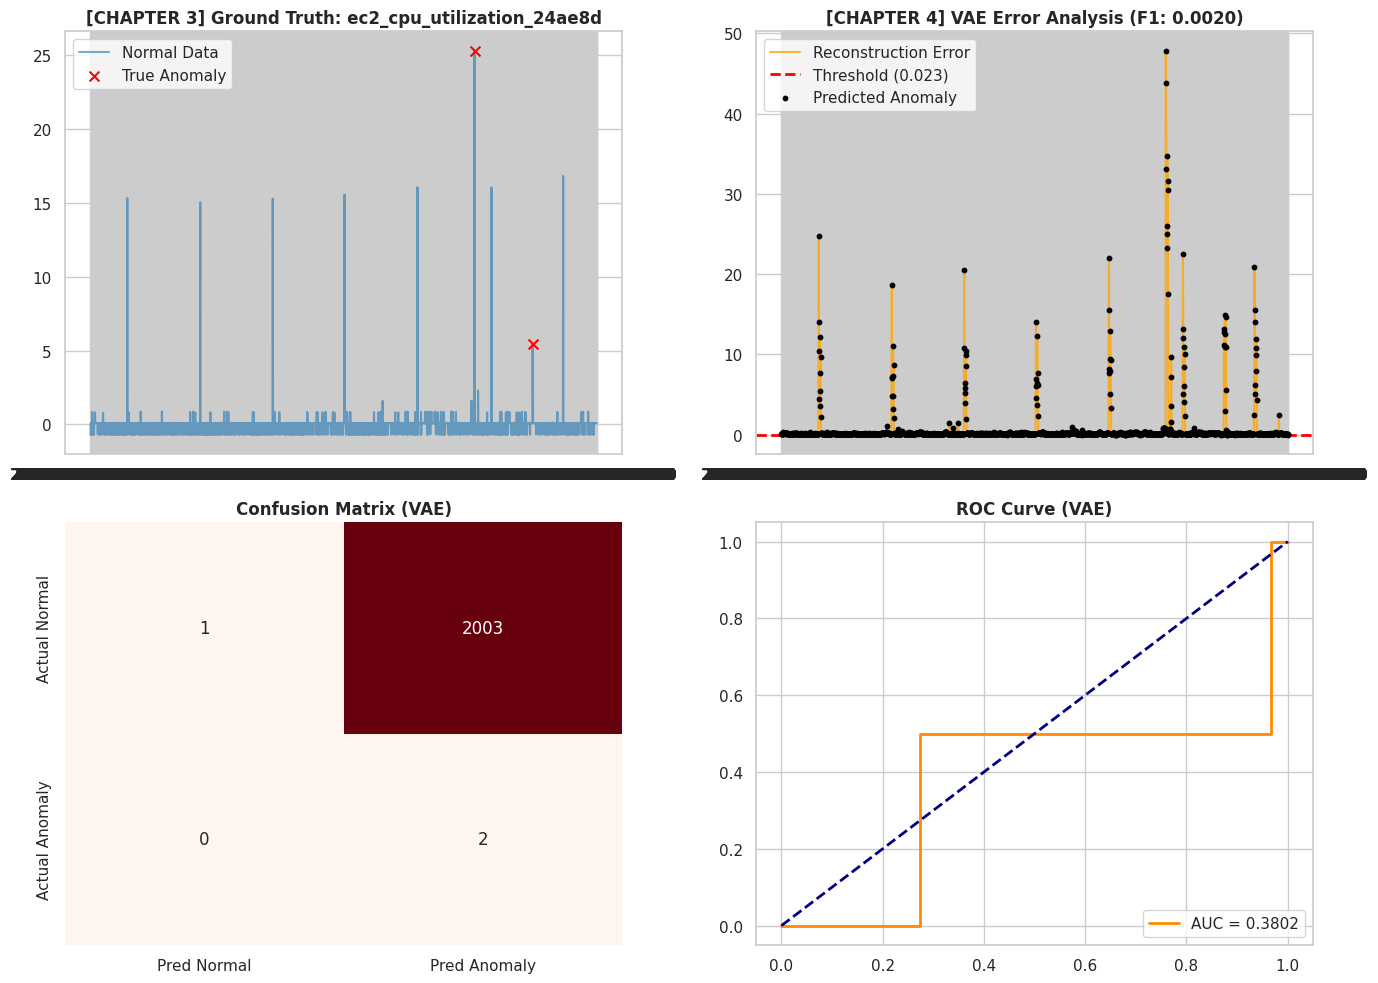


>>> PROCESSING: ec2_cpu_utilization_53ea38
    AUC: 0.6788 | F1: 0.0029


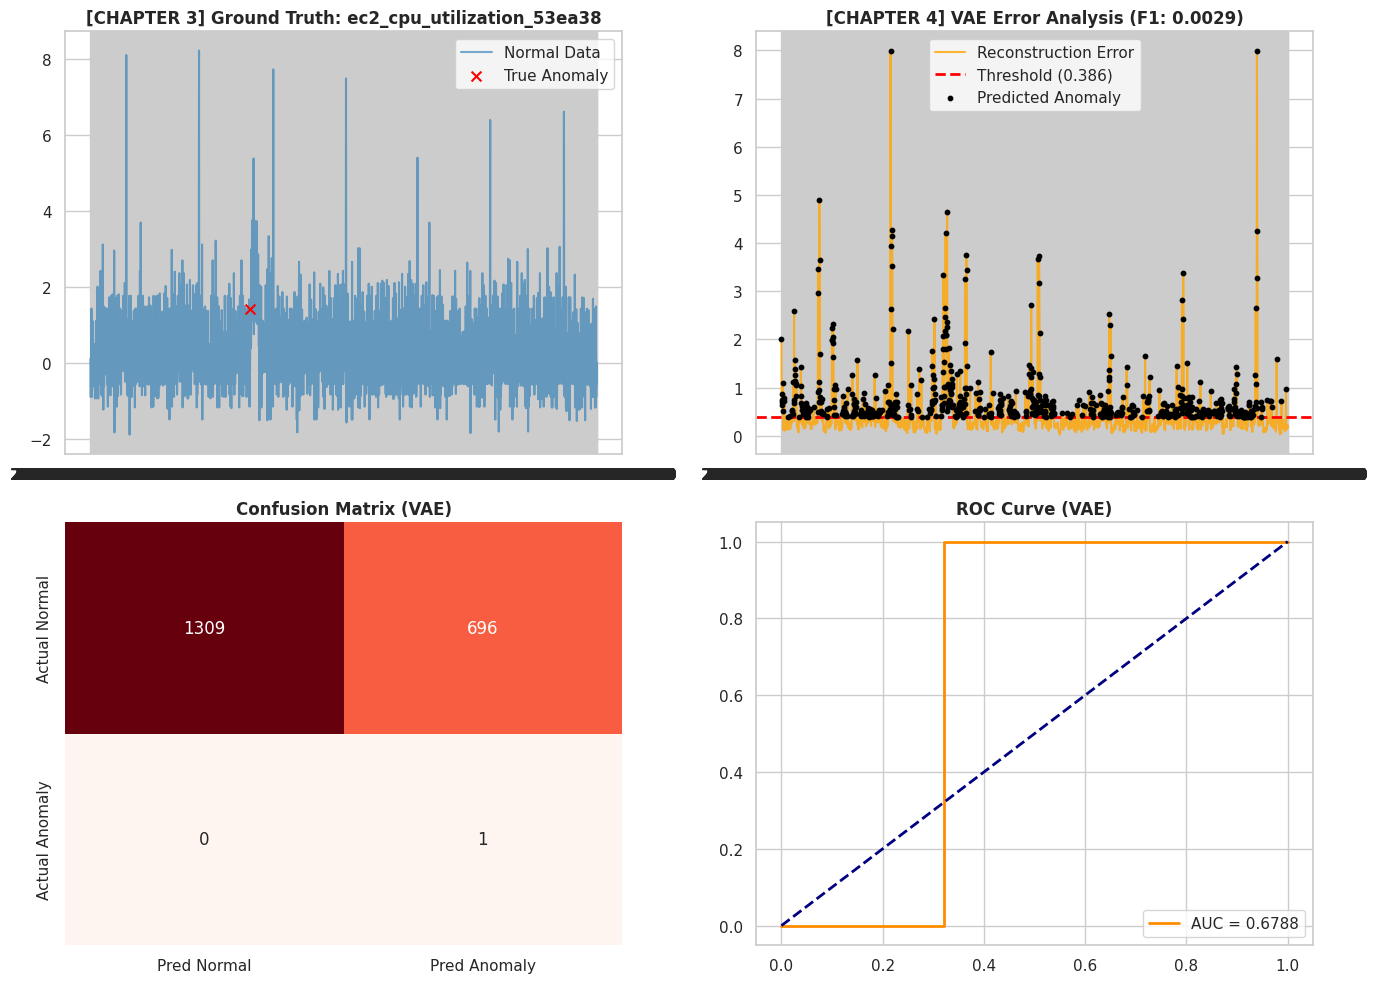


>>> PROCESSING: ec2_cpu_utilization_5f5533
    AUC: 0.4464 | F1: 0.0018


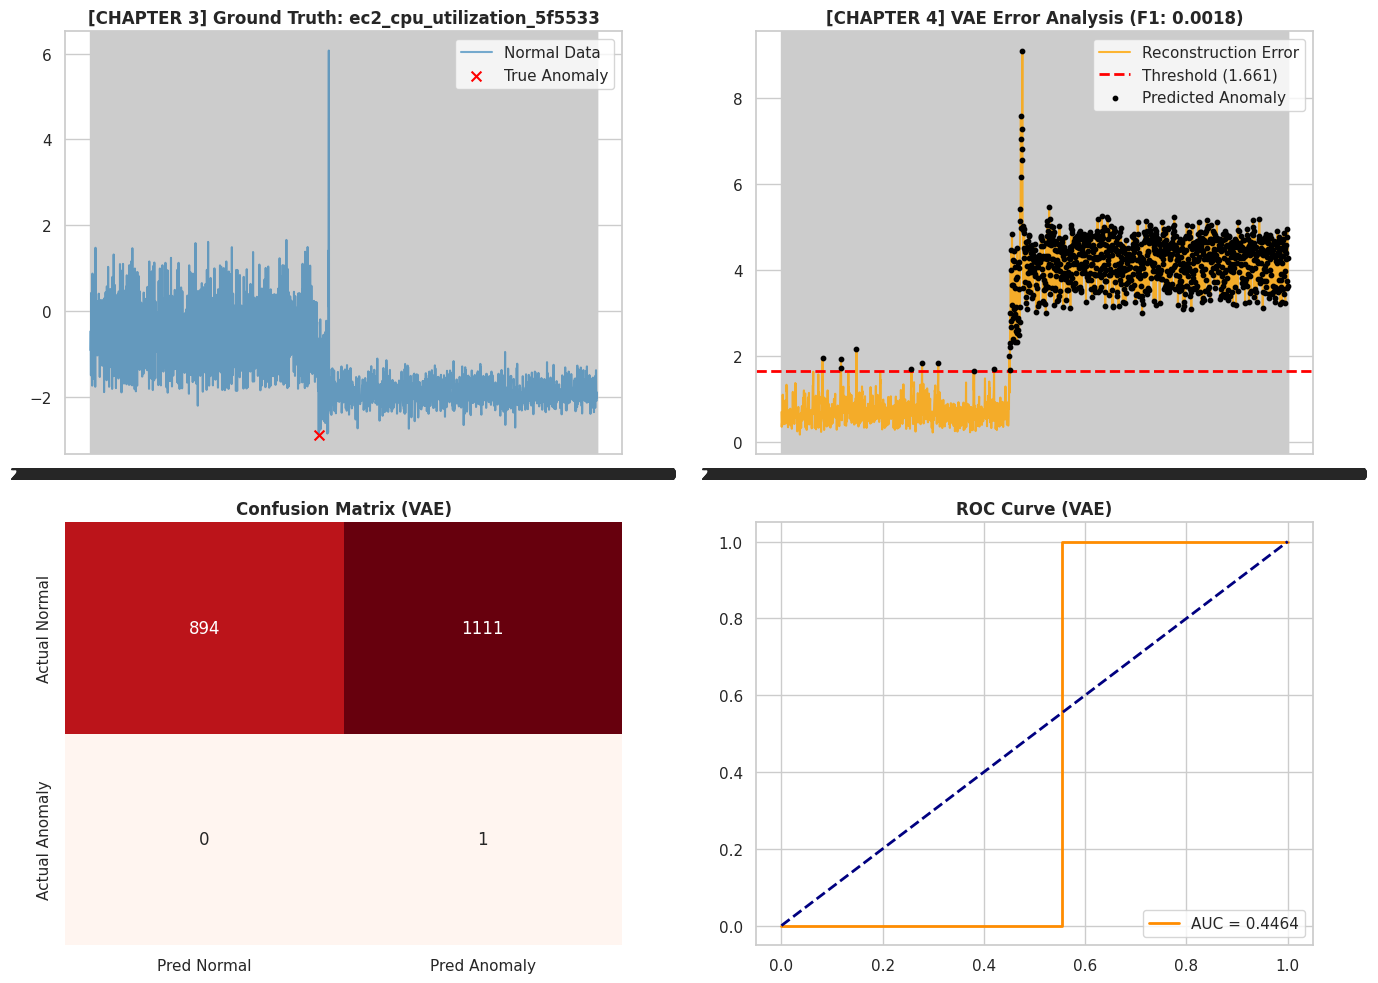


>>> PROCESSING: ec2_cpu_utilization_ac20cd
    AUC: 0.7706 | F1: 0.0043


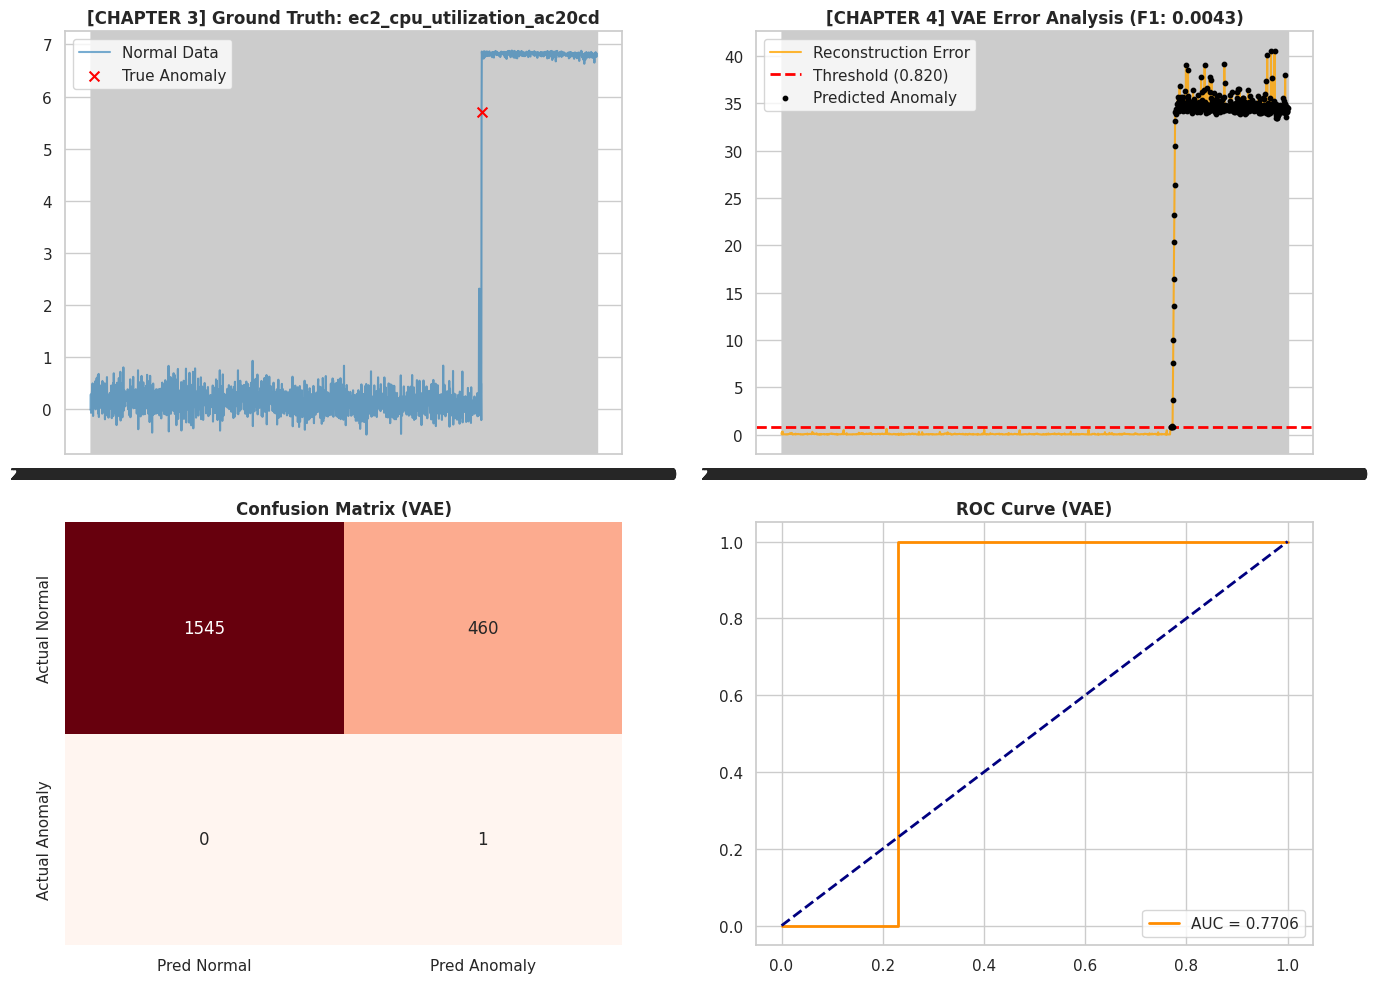


>>> PROCESSING: ec2_cpu_utilization_fe7f93
    AUC: 0.8318 | F1: 0.0364


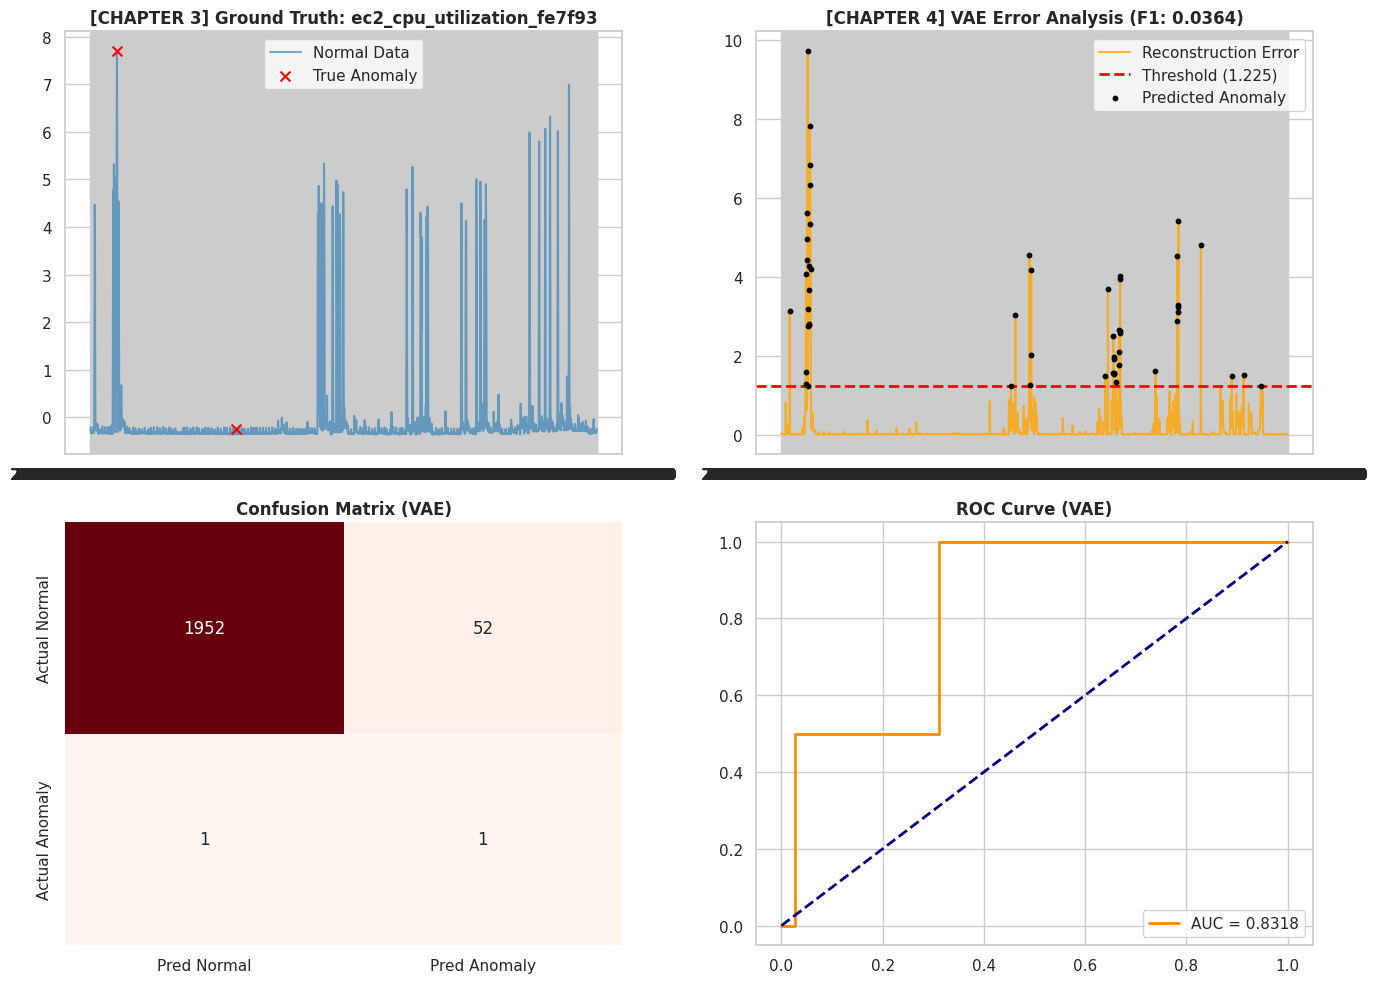


FINAL SUMMARY (VAE-LSTM)
                       source       auc        f1
0  ec2_cpu_utilization_24ae8d  0.380240  0.001993
1  ec2_cpu_utilization_53ea38  0.678803  0.002865
2  ec2_cpu_utilization_5f5533  0.446384  0.001797
3  ec2_cpu_utilization_ac20cd  0.770574  0.004329
4  ec2_cpu_utilization_fe7f93  0.831836  0.036364
------------------------------------------------------------
AVERAGE AUC (Macro): 0.6216


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob


INPUT_FOLDER = '/content/drive/MyDrive/NAB_RESOURCES/nab_resources/nab_final_split'
TIME_STEPS = 10

BEST_LATENT_DIM = 2
BEST_LSTM_UNITS = 64

# --- PLOTTING MODULE ---
def setup_plot_style():
    sns.set_theme(style="whitegrid")
    plt.rcParams['figure.figsize'] = (12, 6)

def show_all_plots(df_test, scores, y_pred, threshold, auc, f1, source):
    df_plot = df_test.iloc[TIME_STEPS:].copy()

    fig = plt.figure(figsize=(14, 10))
    gs = fig.add_gridspec(2, 2)

    ax1 = fig.add_subplot(gs[0, 0])
    ax1.plot(df_plot['timestamp'], df_plot['value_scaled'], label='Normal Data', color='#1f77b4', alpha=0.6)
    anom = df_plot[df_plot['label'] == 1]
    if not anom.empty:
        ax1.scatter(anom['timestamp'], anom['value_scaled'], c='red', s=50, label='True Anomaly', zorder=5, marker='x')
    ax1.set_title(f"[CHAPTER 3] Ground Truth: {source}", fontweight='bold')
    ax1.legend()

    ax2 = fig.add_subplot(gs[0, 1])
    ax2.plot(df_plot['timestamp'], scores, color='orange', alpha=0.8, label='Reconstruction Error')
    ax2.axhline(threshold, color='red', linestyle='--', linewidth=2, label=f'Threshold ({threshold:.3f})')
    idx_pred = np.where(y_pred == 1)[0]
    if len(idx_pred) > 0:
        ax2.scatter(df_plot['timestamp'].iloc[idx_pred], scores[idx_pred], color='black', s=10, label='Predicted Anomaly', zorder=4)
    ax2.set_title(f"[CHAPTER 4] VAE Error Analysis (F1: {f1:.4f})", fontweight='bold')
    ax2.legend()

    ax3 = fig.add_subplot(gs[1, 0])
    cm = confusion_matrix(df_plot['label'], y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False, ax=ax3,
                xticklabels=['Pred Normal', 'Pred Anomaly'], yticklabels=['Actual Normal', 'Actual Anomaly'])
    ax3.set_title("Confusion Matrix (VAE)", fontweight='bold')

    ax4 = fig.add_subplot(gs[1, 1])
    fpr, tpr, _ = roc_curve(df_plot['label'], scores)
    ax4.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc:.4f}')
    ax4.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax4.set_title("ROC Curve (VAE)", fontweight='bold')
    ax4.legend(loc="lower right")

    plt.tight_layout()
    plt.show()


def build_vae_final():
    enc_in = keras.Input(shape=(TIME_STEPS, 1))
    x = layers.LSTM(BEST_LSTM_UNITS, return_sequences=False)(enc_in)
    z_mean = layers.Dense(BEST_LATENT_DIM)(x)
    z_log_var = layers.Dense(BEST_LATENT_DIM)(x)

    def sampling(args):
        zm, zv = args
        batch = tf.shape(zm)[0]
        dim = tf.shape(zm)[1]
        eps = tf.keras.backend.random_normal(shape=(batch, dim))
        return zm + tf.keras.backend.exp(0.5 * zv) * eps

    z = layers.Lambda(sampling)([z_mean, z_log_var])
    encoder = keras.Model(enc_in, [z_mean, z_log_var, z])

    dec_in = keras.Input(shape=(BEST_LATENT_DIM,))
    x = layers.RepeatVector(TIME_STEPS)(dec_in)
    x = layers.LSTM(BEST_LSTM_UNITS, return_sequences=True)(x)
    dec_out = layers.TimeDistributed(layers.Dense(1))(x)
    decoder = keras.Model(dec_in, dec_out)

    class VAE(keras.Model):
        def __init__(self, enc, dec):
            super().__init__()
            self.enc = enc
            self.dec = dec
        def train_step(self, data):
            with tf.GradientTape() as tape:
                zm, zv, z = self.enc(data)
                recon = self.dec(z)
                recon_loss = tf.reduce_mean(tf.reduce_sum(keras.losses.mse(data, recon), axis=1))
                kl_loss = -0.5 * (1 + zv - tf.square(zm) - tf.exp(zv))
                kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
                total_loss = recon_loss + kl_loss
            grads = tape.gradient(total_loss, self.trainable_weights)
            self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
            return {"loss": total_loss}
        def call(self, inputs):
            zm, _, z = self.enc(inputs)
            return self.dec(z)

    vae = VAE(encoder, decoder)
    vae.compile(optimizer=keras.optimizers.Adam(learning_rate=0.005))
    return vae

def create_sequences(values):
    xs = []
    if len(values) > TIME_STEPS:
        for i in range(len(values) - TIME_STEPS):
            xs.append(values[i:(i + TIME_STEPS)])
    return np.array(xs)

setup_plot_style()
print("="*60)
print(f"FINAL VAE EXECUTION (Latent={BEST_LATENT_DIM}, LSTM={BEST_LSTM_UNITS})")
print("="*60)

files = sorted(glob.glob(os.path.join(INPUT_FOLDER, "*_train.csv")))
results = []

for train_path in files:
    tf.keras.backend.clear_session()
    base_name = os.path.basename(train_path).replace('_train.csv', '')
    test_path = train_path.replace('_train.csv', '_test.csv')

    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)

    scaler = StandardScaler()
    train_vals = scaler.fit_transform(train_df['value'].values.reshape(-1,1))
    test_vals = scaler.transform(test_df['value'].values.reshape(-1,1))

    train_df['value_scaled'] = train_vals
    test_df['value_scaled'] = test_vals

    X_train = create_sequences(train_vals)
    X_test = create_sequences(test_vals)
    y_true = test_df['label'].values[TIME_STEPS:]

    if len(X_train) > 50:
        vae = build_vae_final()
        vae.fit(X_train, epochs=30, batch_size=32, verbose=0)

        pred = vae.predict(X_test, verbose=0)
        scores = np.mean(np.mean(np.square(X_test - pred), axis=1), axis=1)

        if len(np.unique(y_true)) > 1:
            print(f"\n>>> PROCESSING: {base_name}")
            auc = roc_auc_score(y_true, scores)

            best_f1, best_thresh = 0, 0
            threshs = np.linspace(scores.min(), scores.max(), 200)
            for t in threshs:
                p = (scores > t).astype(int)
                f1 = f1_score(y_true, p, zero_division=0)
                if f1 > best_f1: best_f1, best_thresh = f1, t

            final_pred = (scores > best_thresh).astype(int)
            print(f"    AUC: {auc:.4f} | F1: {best_f1:.4f}")

            show_all_plots(test_df, scores, final_pred, best_thresh, auc, best_f1, base_name)
            results.append({'source': base_name, 'auc': auc, 'f1': best_f1})

print("\n" + "="*60)
print("FINAL SUMMARY (VAE-LSTM)")
print("="*60)
df_res = pd.DataFrame(results)
if not df_res.empty:
    print(df_res)
    print("-" * 60)
    print(f"AVERAGE AUC (Macro): {df_res['auc'].mean():.4f}")
else:
    print("No results.")
print("="*60)

FINAL VAE EXECUTION (Latent=2, LSTM=64)

>>> PROCESSING: ec2_cpu_utilization_24ae8d
    AUC: 0.3453 | F1: 0.0014


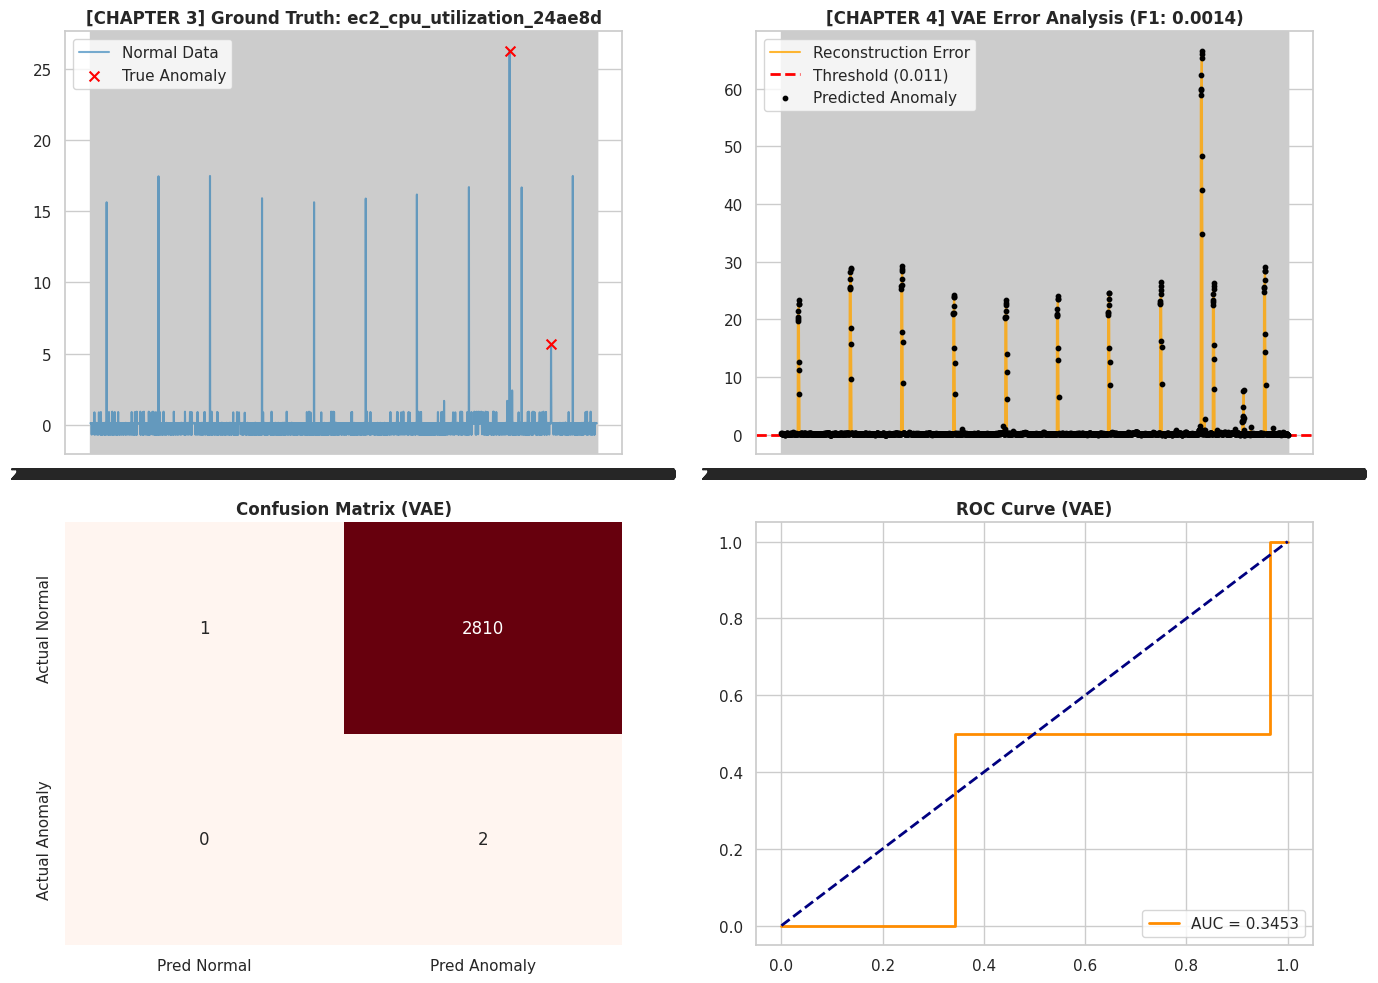


>>> PROCESSING: ec2_cpu_utilization_53ea38
    AUC: 0.6057 | F1: 0.0053


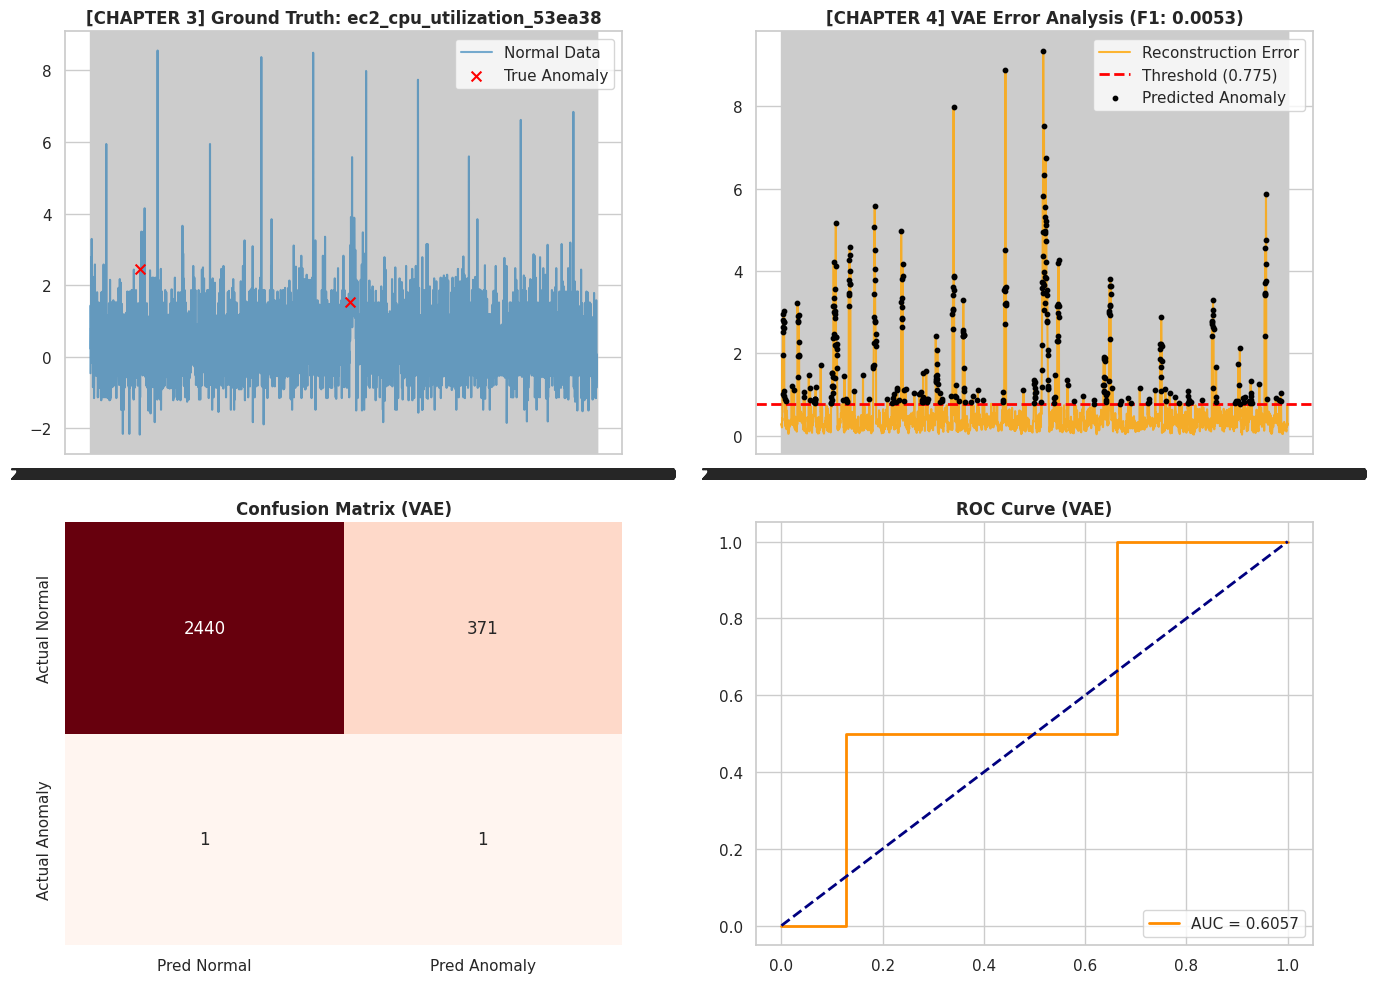


>>> PROCESSING: ec2_cpu_utilization_5f5533
    AUC: 0.4465 | F1: 0.0019


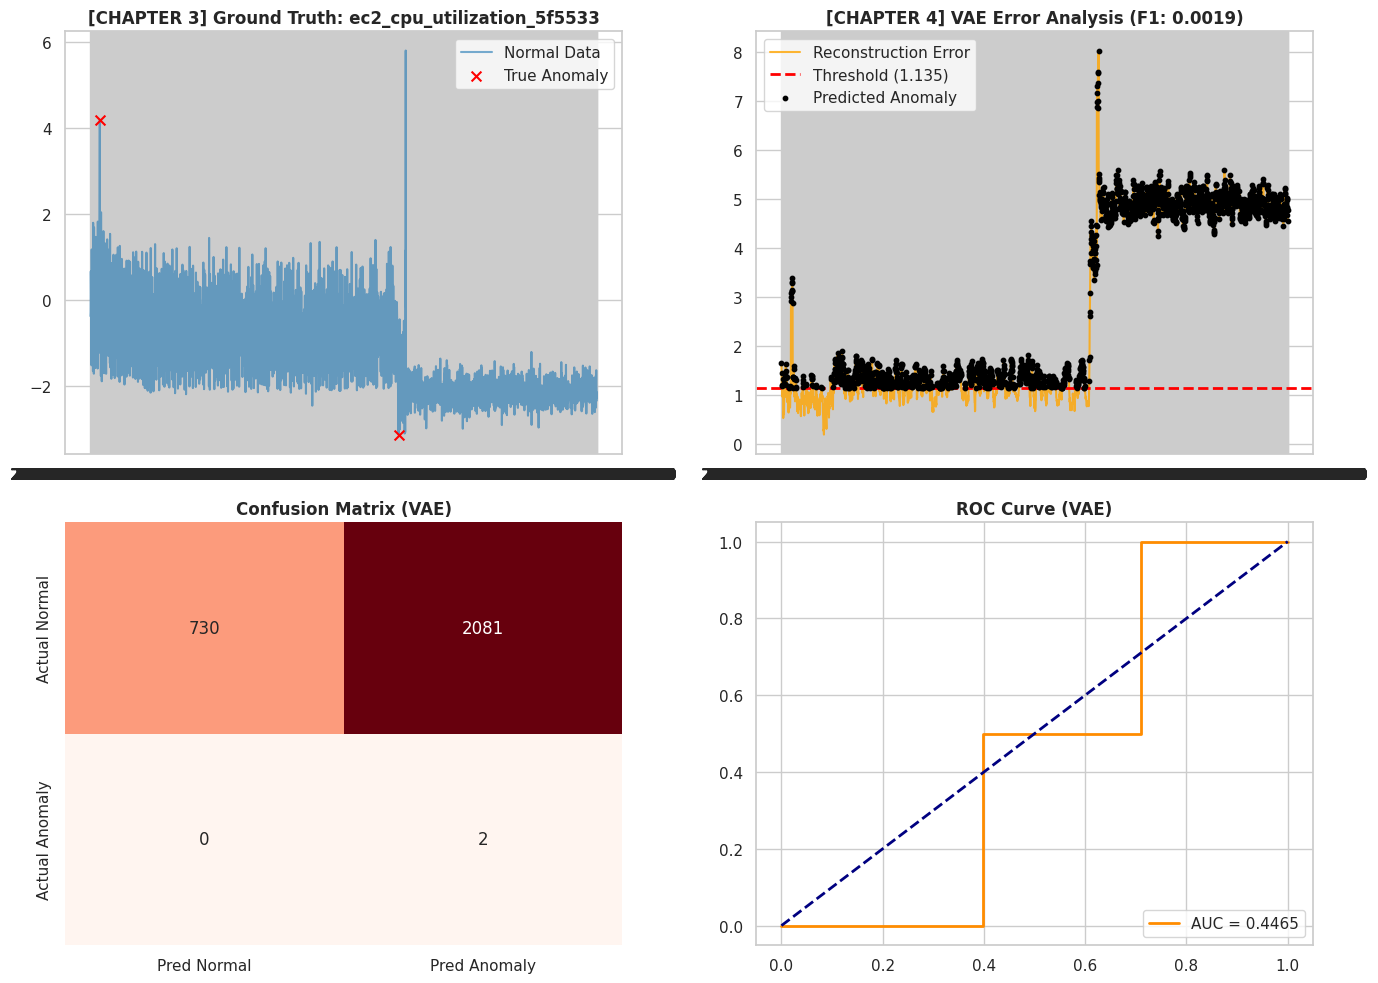


>>> PROCESSING: ec2_cpu_utilization_77c1ca
    AUC: 0.6241 | F1: 0.0018


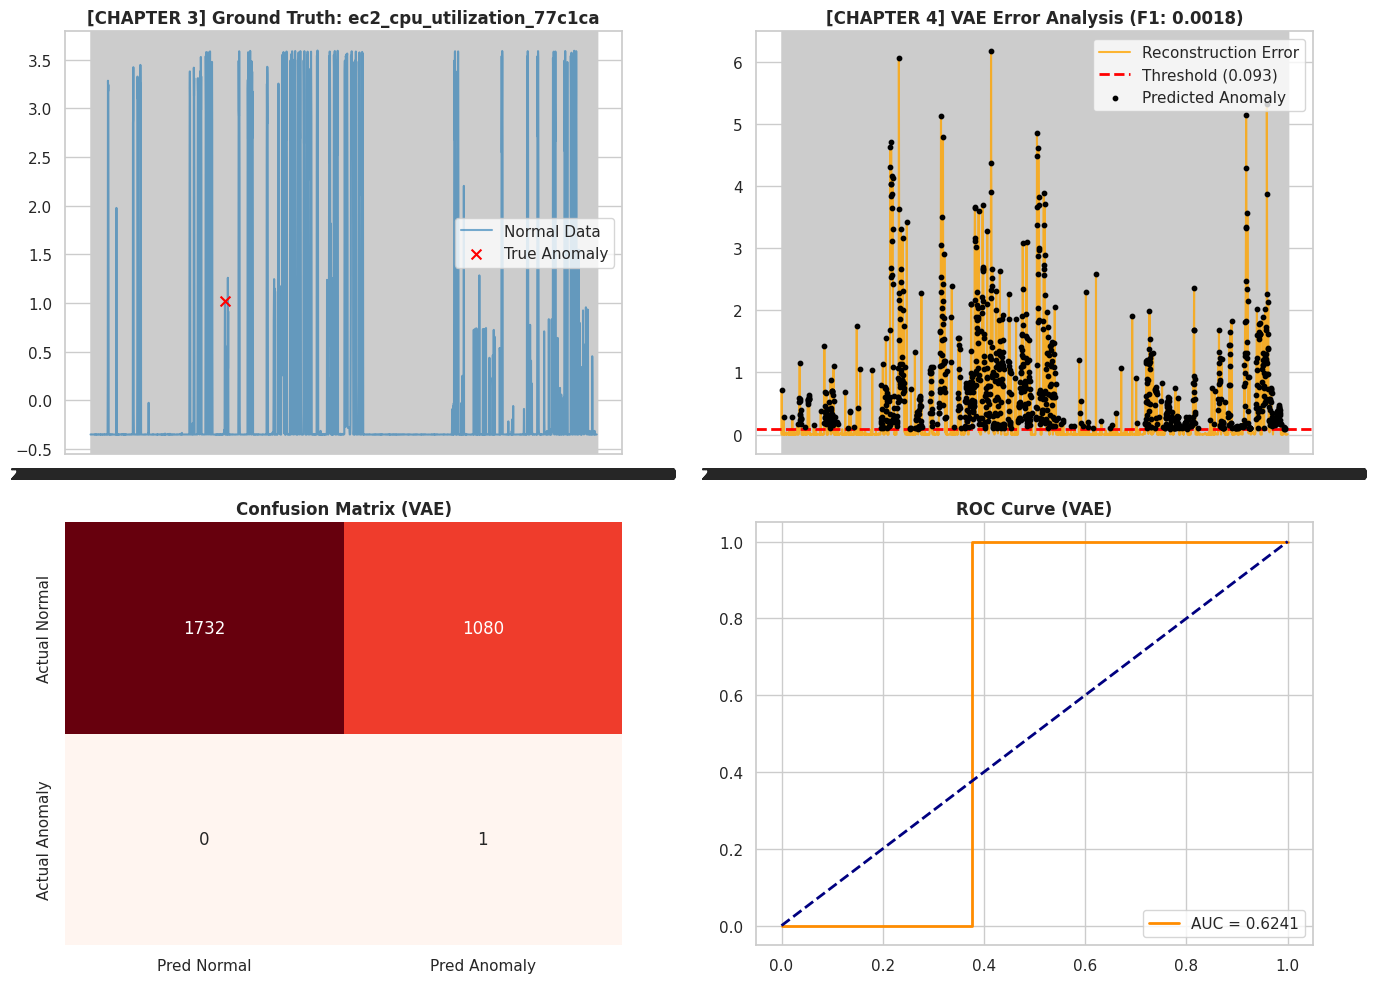


>>> PROCESSING: ec2_cpu_utilization_825cc2
    AUC: 0.6418 | F1: 0.0132


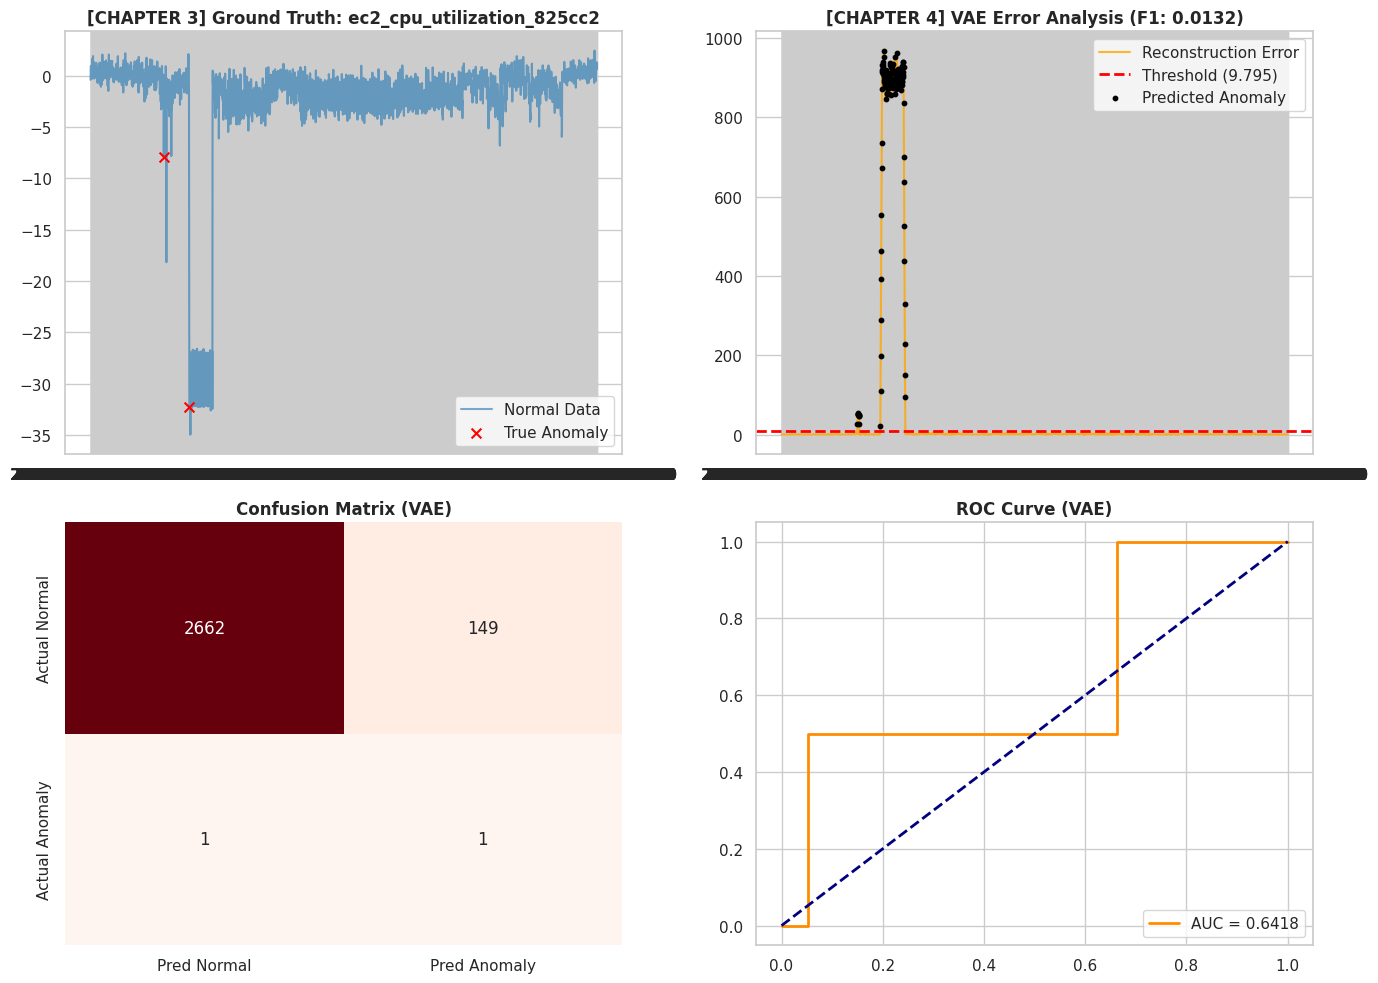


>>> PROCESSING: ec2_cpu_utilization_ac20cd
    AUC: 0.8350 | F1: 0.0043


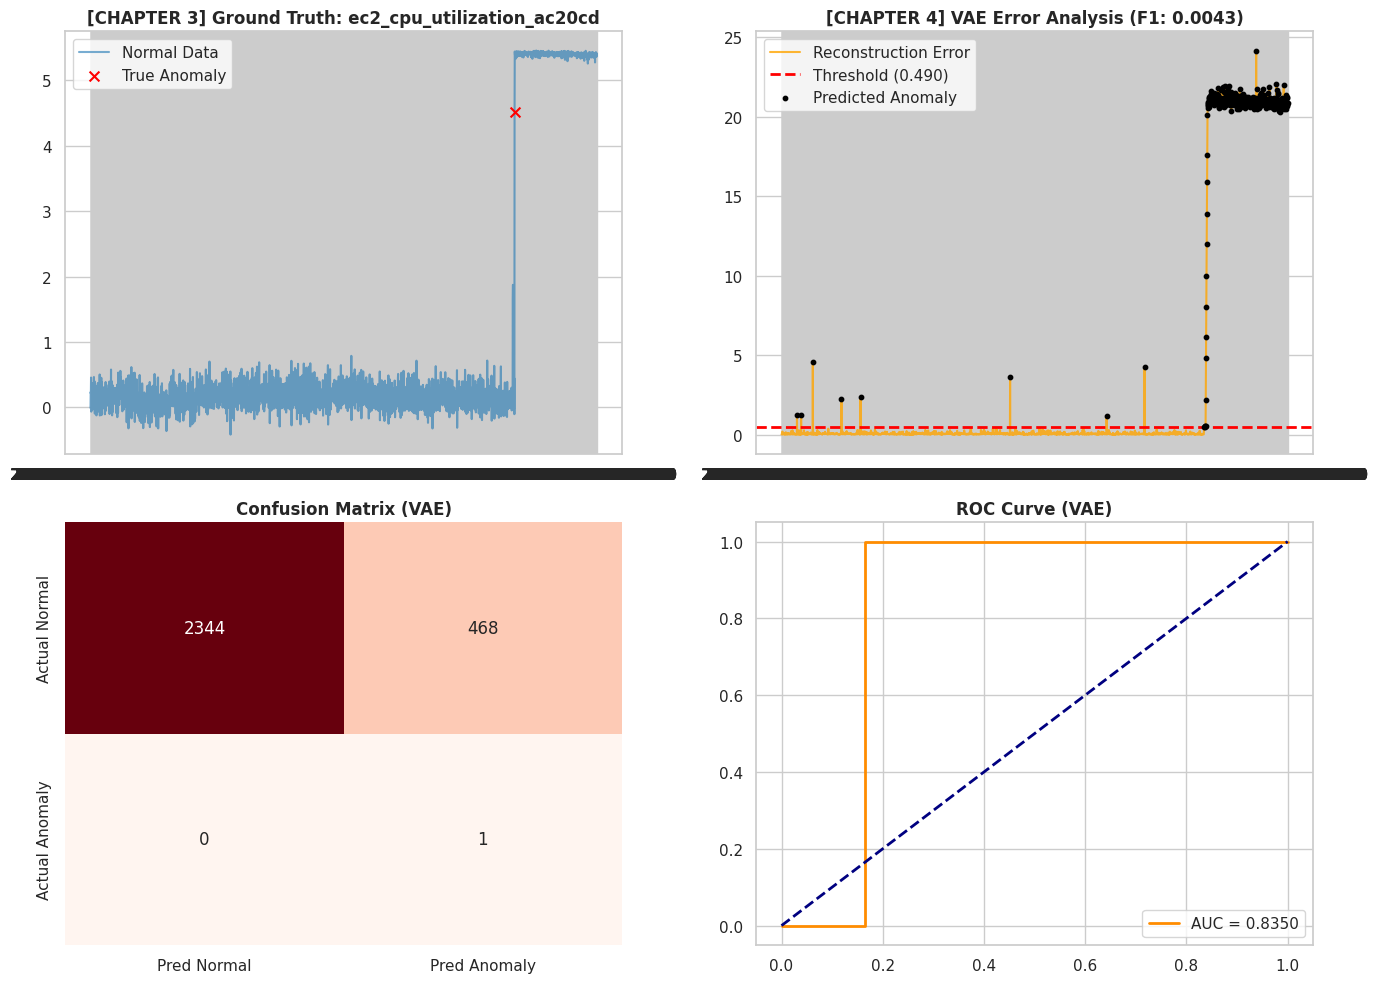


>>> PROCESSING: ec2_cpu_utilization_fe7f93
    AUC: 0.6185 | F1: 0.0260


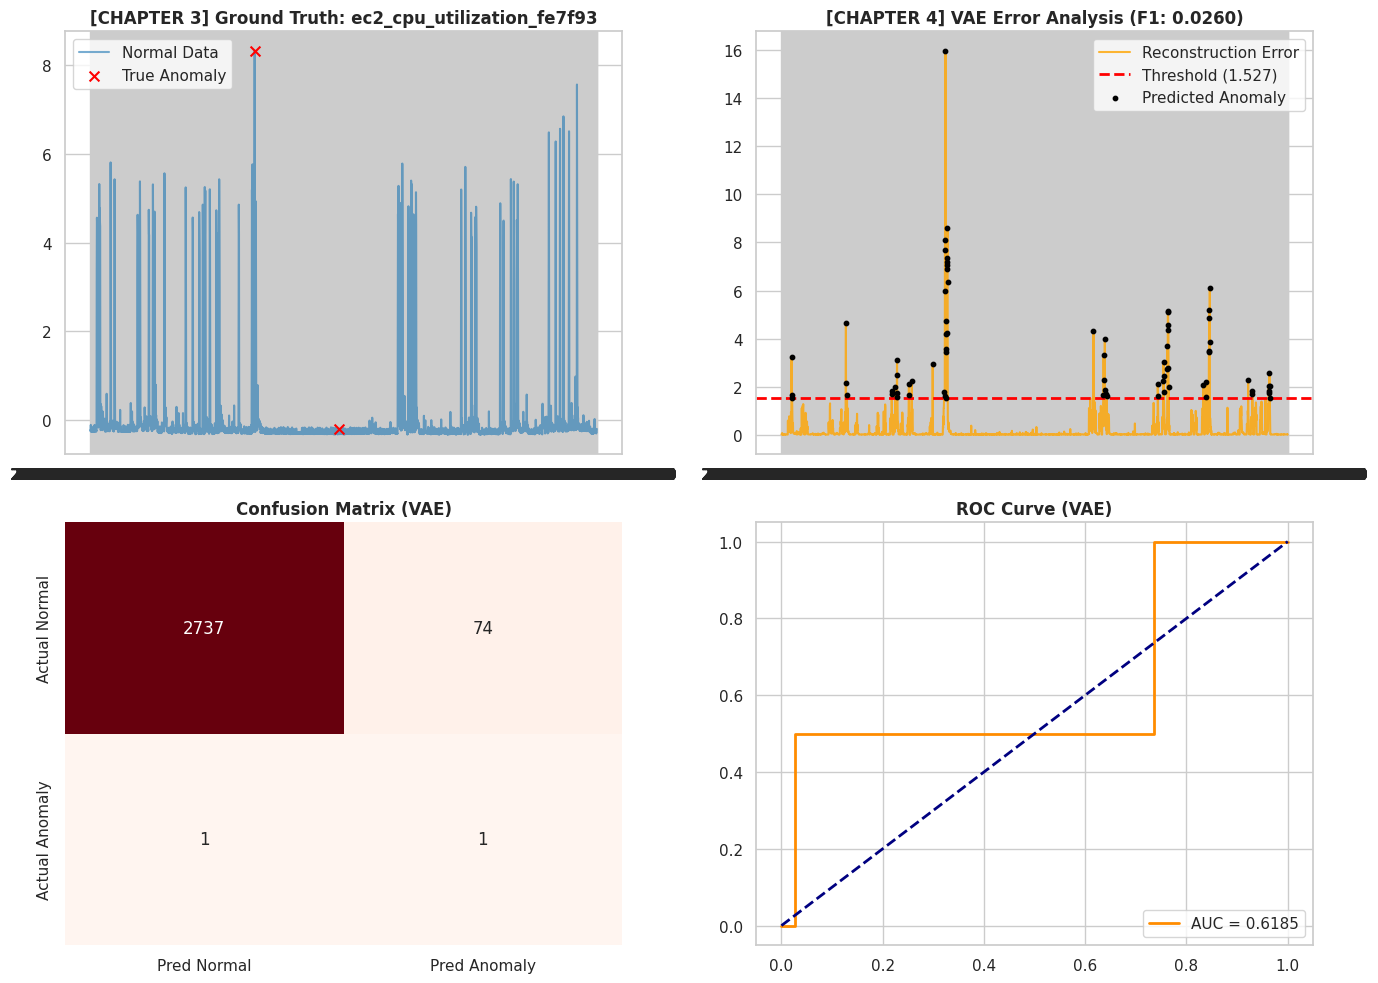


FINAL SUMMARY (VAE-LSTM)
                       source       auc        f1
0  ec2_cpu_utilization_24ae8d  0.345251  0.001421
1  ec2_cpu_utilization_53ea38  0.605656  0.005348
2  ec2_cpu_utilization_5f5533  0.446460  0.001918
3  ec2_cpu_utilization_77c1ca  0.624111  0.001848
4  ec2_cpu_utilization_825cc2  0.641764  0.013158
5  ec2_cpu_utilization_ac20cd  0.834993  0.004255
6  ec2_cpu_utilization_fe7f93  0.618463  0.025974
------------------------------------------------------------
AVERAGE AUC (Macro): 0.5881


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

INPUT_FOLDER = '/content/drive/MyDrive/NAB_RESOURCES/nab_resources/nab_final_split_30'
TIME_STEPS = 10

BEST_LATENT_DIM = 2
BEST_LSTM_UNITS = 64

def setup_plot_style():
    sns.set_theme(style="whitegrid")
    plt.rcParams['figure.figsize'] = (12, 6)

def show_all_plots(df_test, scores, y_pred, threshold, auc, f1, source):
    df_plot = df_test.iloc[TIME_STEPS:].copy()

    fig = plt.figure(figsize=(14, 10))
    gs = fig.add_gridspec(2, 2)

    ax1 = fig.add_subplot(gs[0, 0])
    ax1.plot(df_plot['timestamp'], df_plot['value_scaled'], label='Normal Data', color='#1f77b4', alpha=0.6)
    anom = df_plot[df_plot['label'] == 1]
    if not anom.empty:
        ax1.scatter(anom['timestamp'], anom['value_scaled'], c='red', s=50, label='True Anomaly', zorder=5, marker='x')
    ax1.set_title(f"[CHAPTER 3] Ground Truth: {source}", fontweight='bold')
    ax1.legend()

    ax2 = fig.add_subplot(gs[0, 1])
    ax2.plot(df_plot['timestamp'], scores, color='orange', alpha=0.8, label='Reconstruction Error')
    ax2.axhline(threshold, color='red', linestyle='--', linewidth=2, label=f'Threshold ({threshold:.3f})')
    idx_pred = np.where(y_pred == 1)[0]
    if len(idx_pred) > 0:
        ax2.scatter(df_plot['timestamp'].iloc[idx_pred], scores[idx_pred], color='black', s=10, label='Predicted Anomaly', zorder=4)
    ax2.set_title(f"[CHAPTER 4] VAE Error Analysis (F1: {f1:.4f})", fontweight='bold')
    ax2.legend()

    ax3 = fig.add_subplot(gs[1, 0])
    cm = confusion_matrix(df_plot['label'], y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False, ax=ax3,
                xticklabels=['Pred Normal', 'Pred Anomaly'], yticklabels=['Actual Normal', 'Actual Anomaly'])
    ax3.set_title("Confusion Matrix (VAE)", fontweight='bold')

    ax4 = fig.add_subplot(gs[1, 1])
    fpr, tpr, _ = roc_curve(df_plot['label'], scores)
    ax4.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc:.4f}')
    ax4.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax4.set_title("ROC Curve (VAE)", fontweight='bold')
    ax4.legend(loc="lower right")

    plt.tight_layout()
    plt.show()

def build_vae_final():
    enc_in = keras.Input(shape=(TIME_STEPS, 1))
    x = layers.LSTM(BEST_LSTM_UNITS, return_sequences=False)(enc_in)
    z_mean = layers.Dense(BEST_LATENT_DIM)(x)
    z_log_var = layers.Dense(BEST_LATENT_DIM)(x)

    def sampling(args):
        zm, zv = args
        batch = tf.shape(zm)[0]
        dim = tf.shape(zm)[1]
        eps = tf.keras.backend.random_normal(shape=(batch, dim))
        return zm + tf.keras.backend.exp(0.5 * zv) * eps

    z = layers.Lambda(sampling)([z_mean, z_log_var])
    encoder = keras.Model(enc_in, [z_mean, z_log_var, z])

    dec_in = keras.Input(shape=(BEST_LATENT_DIM,))
    x = layers.RepeatVector(TIME_STEPS)(dec_in)
    x = layers.LSTM(BEST_LSTM_UNITS, return_sequences=True)(x)
    dec_out = layers.TimeDistributed(layers.Dense(1))(x)
    decoder = keras.Model(dec_in, dec_out)

    class VAE(keras.Model):
        def __init__(self, enc, dec):
            super().__init__()
            self.enc = enc
            self.dec = dec
        def train_step(self, data):
            with tf.GradientTape() as tape:
                zm, zv, z = self.enc(data)
                recon = self.dec(z)
                recon_loss = tf.reduce_mean(tf.reduce_sum(keras.losses.mse(data, recon), axis=1))
                kl_loss = -0.5 * (1 + zv - tf.square(zm) - tf.exp(zv))
                kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
                total_loss = recon_loss + kl_loss
            grads = tape.gradient(total_loss, self.trainable_weights)
            self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
            return {"loss": total_loss}
        def call(self, inputs):
            zm, _, z = self.enc(inputs)
            return self.dec(z)

    vae = VAE(encoder, decoder)
    vae.compile(optimizer=keras.optimizers.Adam(learning_rate=0.005))
    return vae

def create_sequences(values):
    xs = []
    if len(values) > TIME_STEPS:
        for i in range(len(values) - TIME_STEPS):
            xs.append(values[i:(i + TIME_STEPS)])
    return np.array(xs)

setup_plot_style()
print("="*60)
print(f"FINAL VAE EXECUTION (Latent={BEST_LATENT_DIM}, LSTM={BEST_LSTM_UNITS})")
print("="*60)

files = sorted(glob.glob(os.path.join(INPUT_FOLDER, "*_train.csv")))
results = []

for train_path in files:
    tf.keras.backend.clear_session()
    base_name = os.path.basename(train_path).replace('_train.csv', '')
    test_path = train_path.replace('_train.csv', '_test.csv')

    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)

    scaler = StandardScaler()
    train_vals = scaler.fit_transform(train_df['value'].values.reshape(-1,1))
    test_vals = scaler.transform(test_df['value'].values.reshape(-1,1))

    train_df['value_scaled'] = train_vals
    test_df['value_scaled'] = test_vals

    X_train = create_sequences(train_vals)
    X_test = create_sequences(test_vals)
    y_true = test_df['label'].values[TIME_STEPS:]

    if len(X_train) > 50:
        vae = build_vae_final()
        vae.fit(X_train, epochs=30, batch_size=32, verbose=0) # Epoch 30 buat final

        pred = vae.predict(X_test, verbose=0)
        scores = np.mean(np.mean(np.square(X_test - pred), axis=1), axis=1)

        if len(np.unique(y_true)) > 1:
            print(f"\n>>> PROCESSING: {base_name}")
            auc = roc_auc_score(y_true, scores)

            best_f1, best_thresh = 0, 0
            threshs = np.linspace(scores.min(), scores.max(), 200)
            for t in threshs:
                p = (scores > t).astype(int)
                f1 = f1_score(y_true, p, zero_division=0)
                if f1 > best_f1: best_f1, best_thresh = f1, t

            final_pred = (scores > best_thresh).astype(int)
            print(f"    AUC: {auc:.4f} | F1: {best_f1:.4f}")

            show_all_plots(test_df, scores, final_pred, best_thresh, auc, best_f1, base_name)
            results.append({'source': base_name, 'auc': auc, 'f1': best_f1})

print("\n" + "="*60)
print("FINAL SUMMARY (VAE-LSTM)")
print("="*60)
df_res = pd.DataFrame(results)
if not df_res.empty:
    print(df_res)
    print("-" * 60)
    print(f"AVERAGE AUC (Macro): {df_res['auc'].mean():.4f}")
else:
    print("No results.")
print("="*60)